# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from NuRadioReco.modules.io.rno_g import rnogDataReader
from NuRadioReco.utilities import units
import matplotlib.pyplot as plt
units.ADC = 0.001

# Read files

In [3]:
# When charging
charging = "/Users/daniel/Desktop/1TE721/data/pnfs/ifh.de/acs/radio/diskonly/data/benchmark_files/charging/station21_combined.root"

# Contiues wave
cw = "/Users/daniel/Desktop/1TE721/data/pnfs/ifh.de/acs/radio/diskonly/data/benchmark_files/cw/station21_combined.root"

# Forced trigger
forced = "/Users/daniel/Desktop/1TE721/data/pnfs/ifh.de/acs/radio/diskonly/data/benchmark_files/forced_triggers/station21_combined.root"

# High wind noise
high_wind = "/Users/daniel/Desktop/1TE721/data/pnfs/ifh.de/acs/radio/diskonly/data/benchmark_files/high_wind/station21_combined.root"

# Low-power wide-area network
lorawan = "/Users/daniel/Desktop/1TE721/data/pnfs/ifh.de/acs/radio/diskonly/data/benchmark_files/lorawan/station21_combined.root"

# Plot the differences between triggers

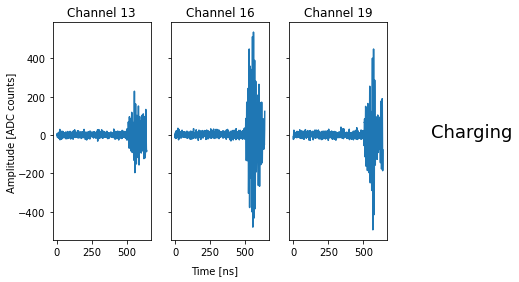

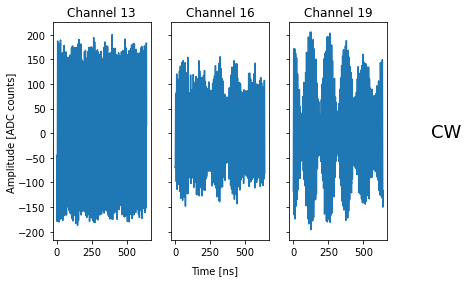

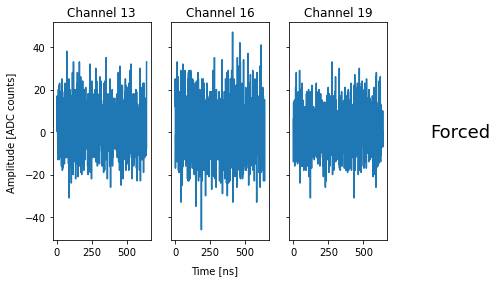

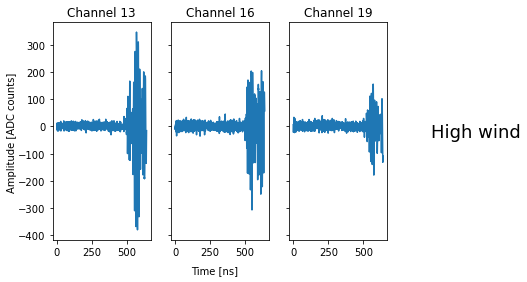

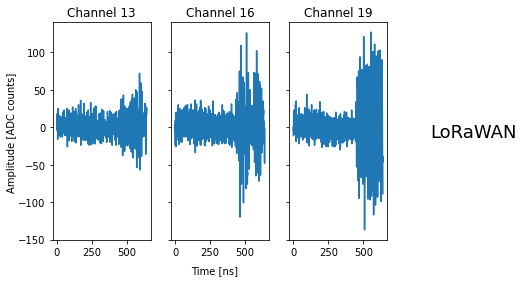

In [4]:
# Create array with type of triggers
trigger_type_array = [charging, cw, forced, high_wind, lorawan]
trigger_type_array_names = ["Charging", "CW", "Forced", "High wind", "LoRaWAN"]


# Loop through each trigger type
for k, trigger_type in enumerate(trigger_type_array):
    
    # Read data from trigger type
    reader = rnogDataReader.RNOGDataReader([trigger_type])
    
    # Get the first event
    event = reader.get_event_i(0)
    
    # Get station 
    station = event.get_station(event.get_station_ids()[0])
    
    # Get channels that corresponds to the upward facing LPDAs
    channel_ids = [13, 16, 19]
    
    # Plotting
    fig, ax = plt.subplots(1,3, sharex=True, sharey=True)

    for i, channel_id in enumerate(channel_ids):
        channel = station.get_channel(channel_id)
        ax[i].plot(channel.get_times()/units.ns, channel.get_trace()/units.ADC)

        ax[i].set_title(f"Channel {channel_id}")


    fig.text(0.5, 0.01, 'Time [ns]', ha='center')
    fig.text(0.02, 0.5, 'Amplitude [ADC counts]', va='center', rotation='vertical')
    fig.text(1, 0.5, f"{trigger_type_array_names[k]}", va='center', fontsize = 18)

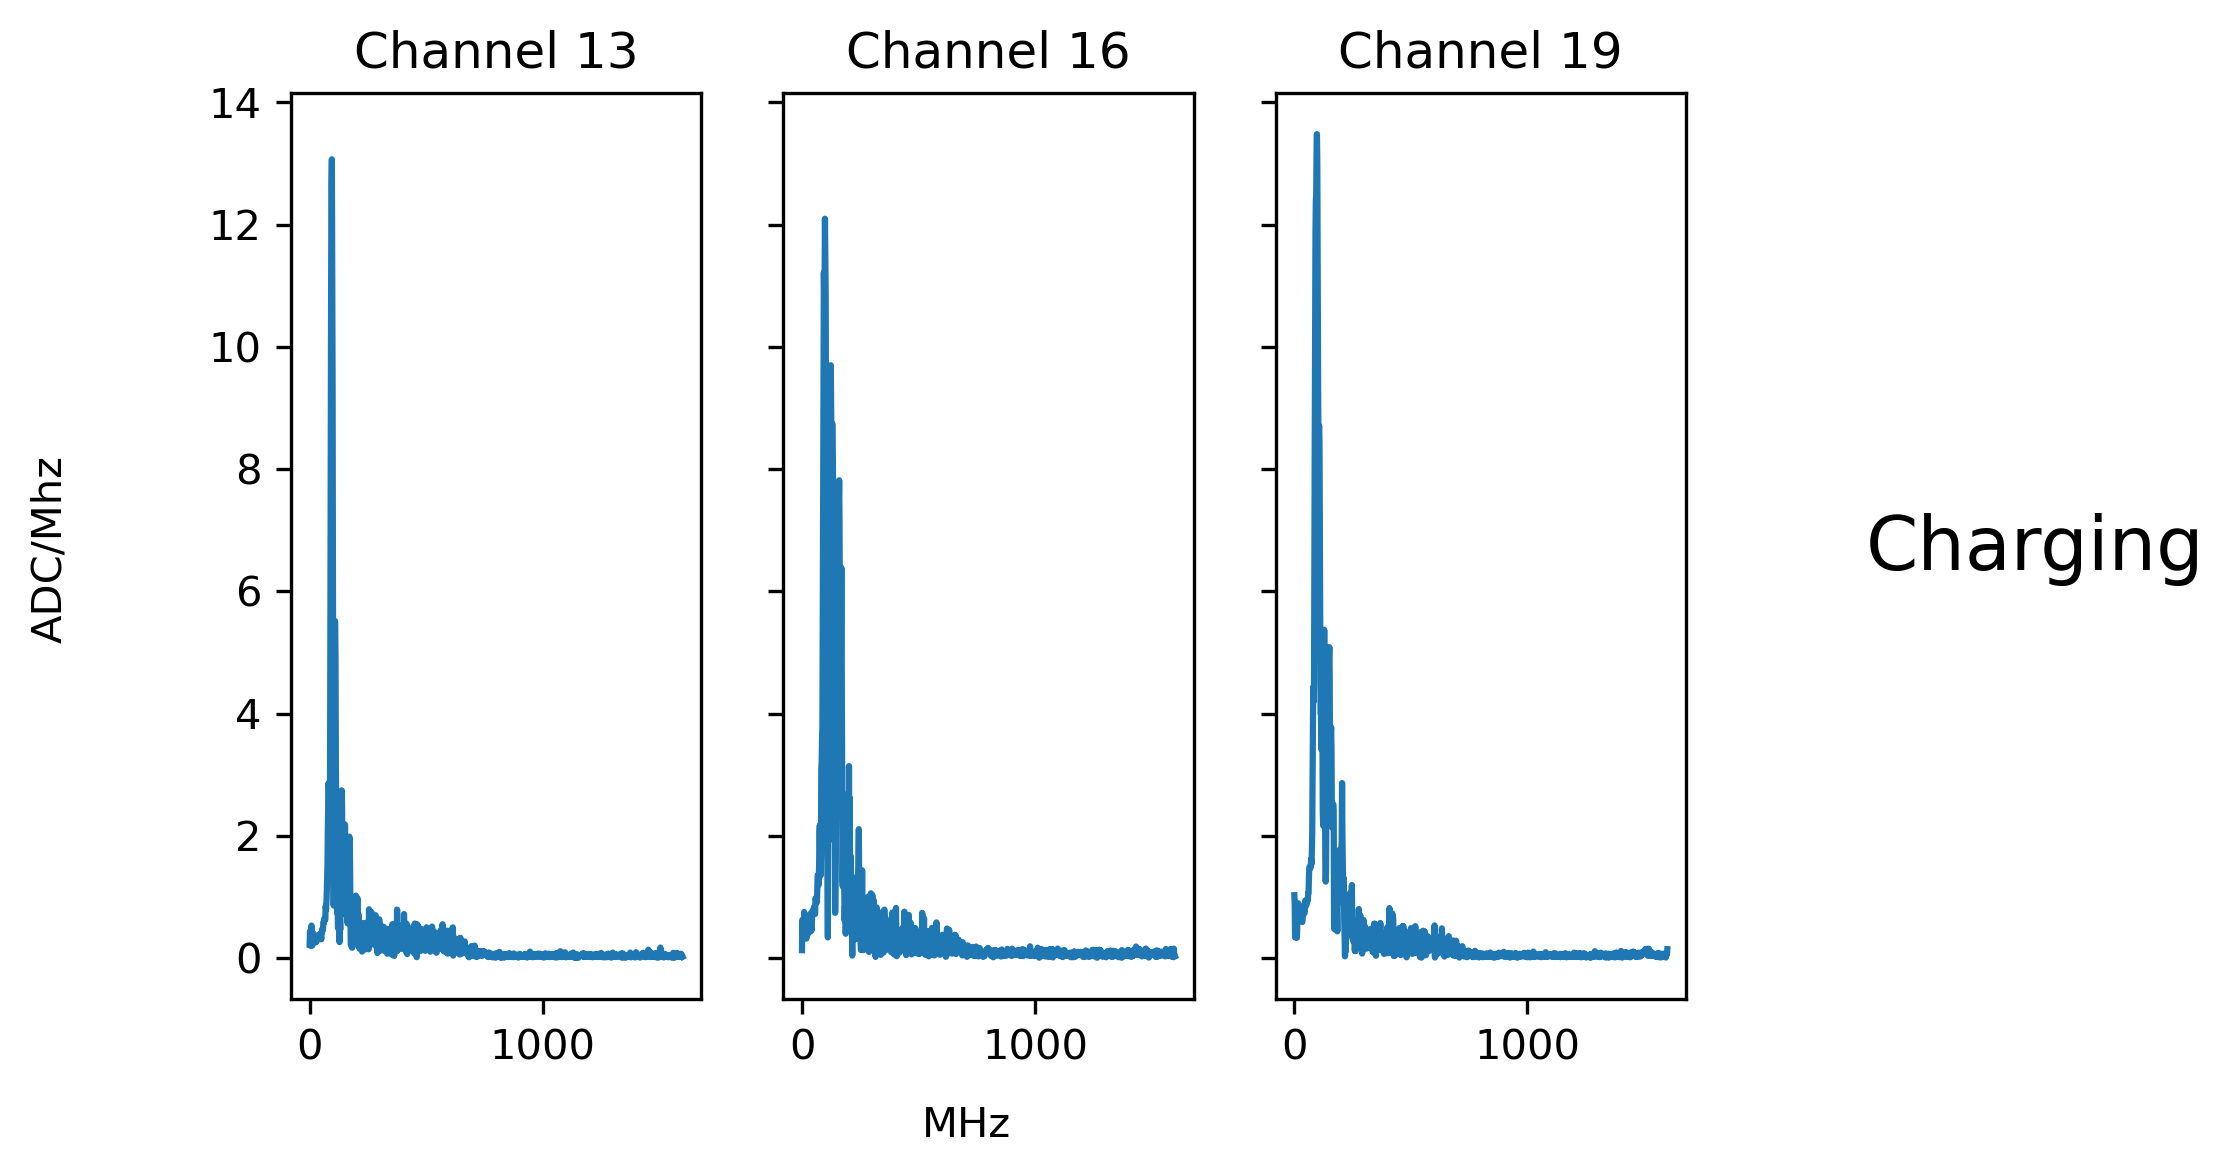

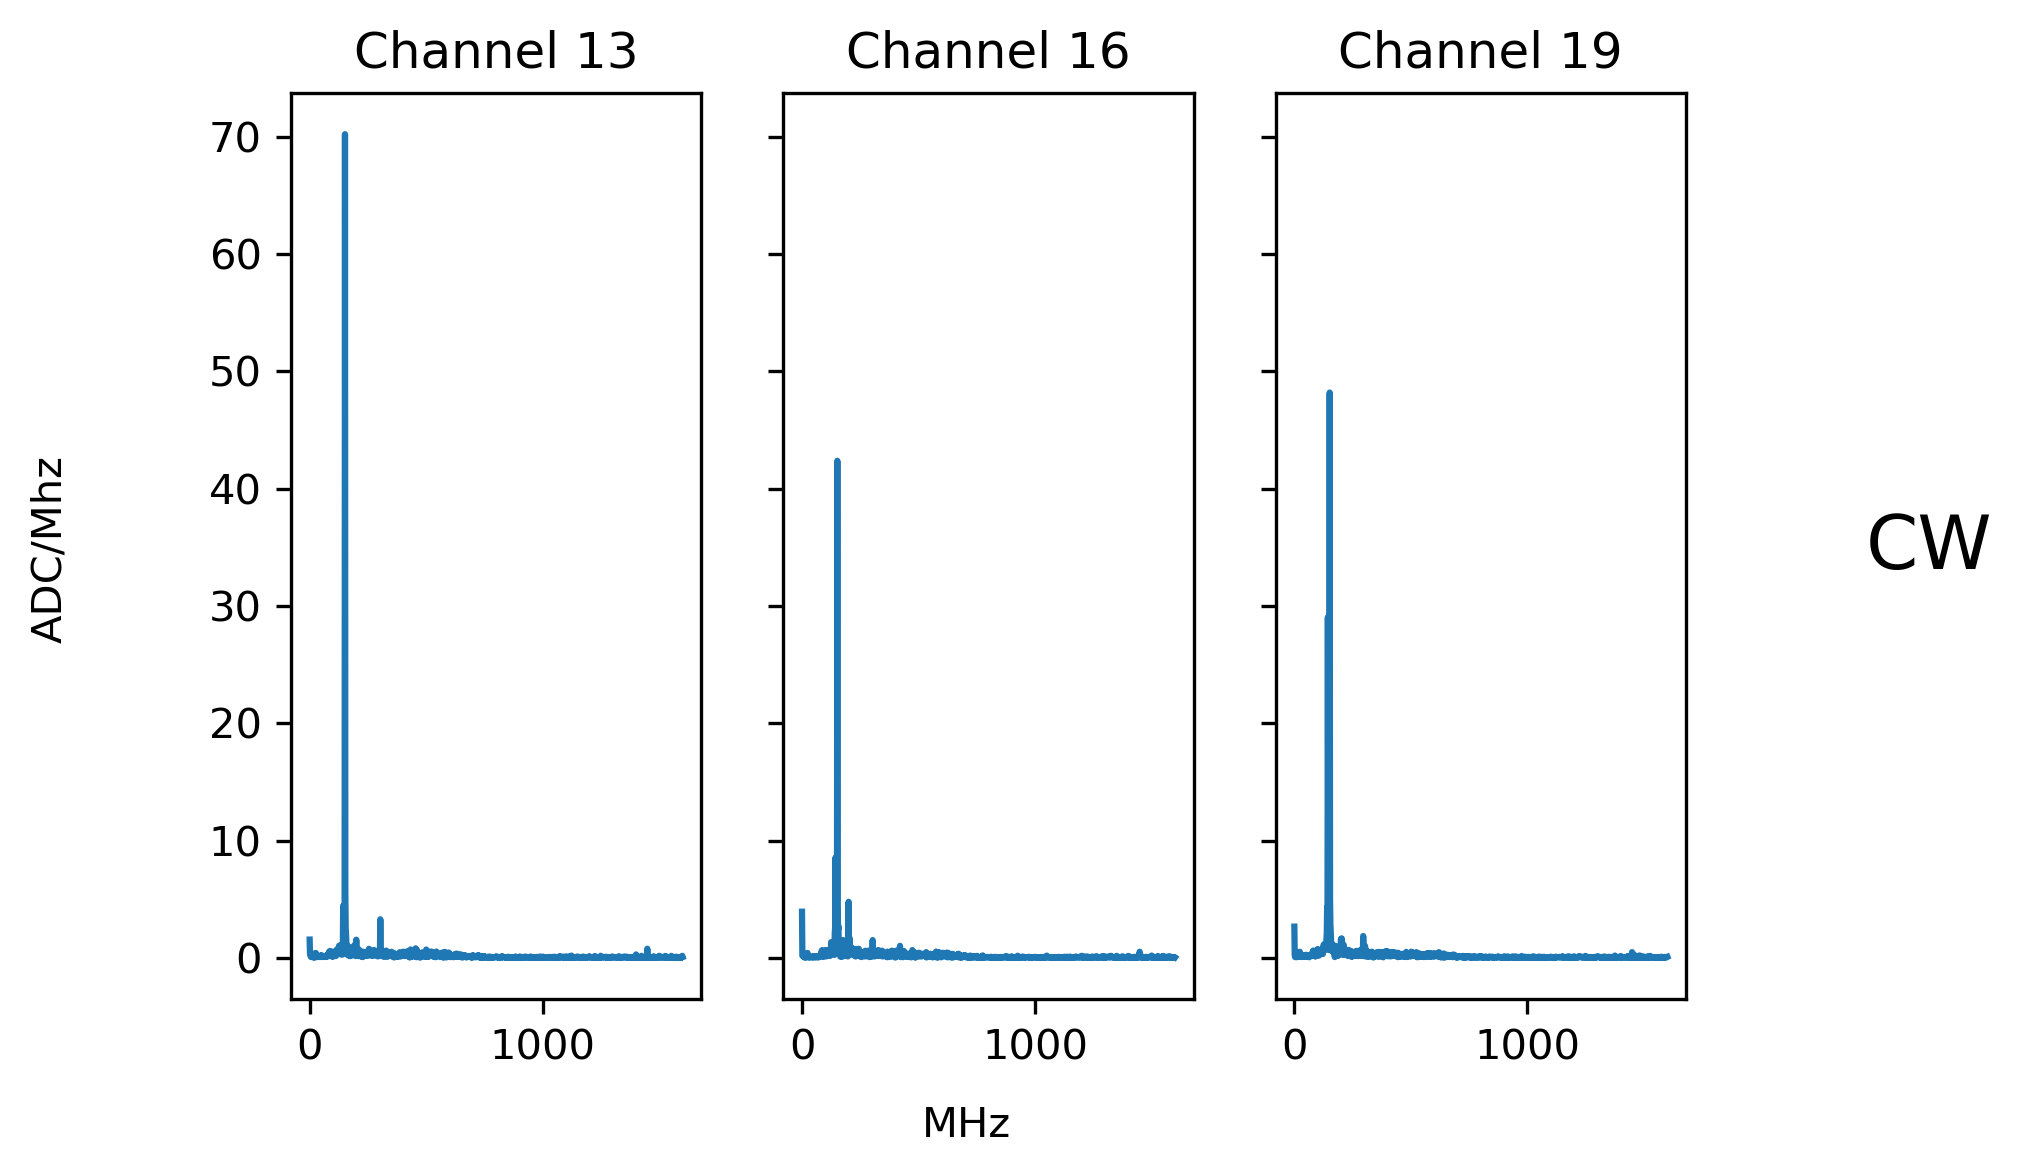

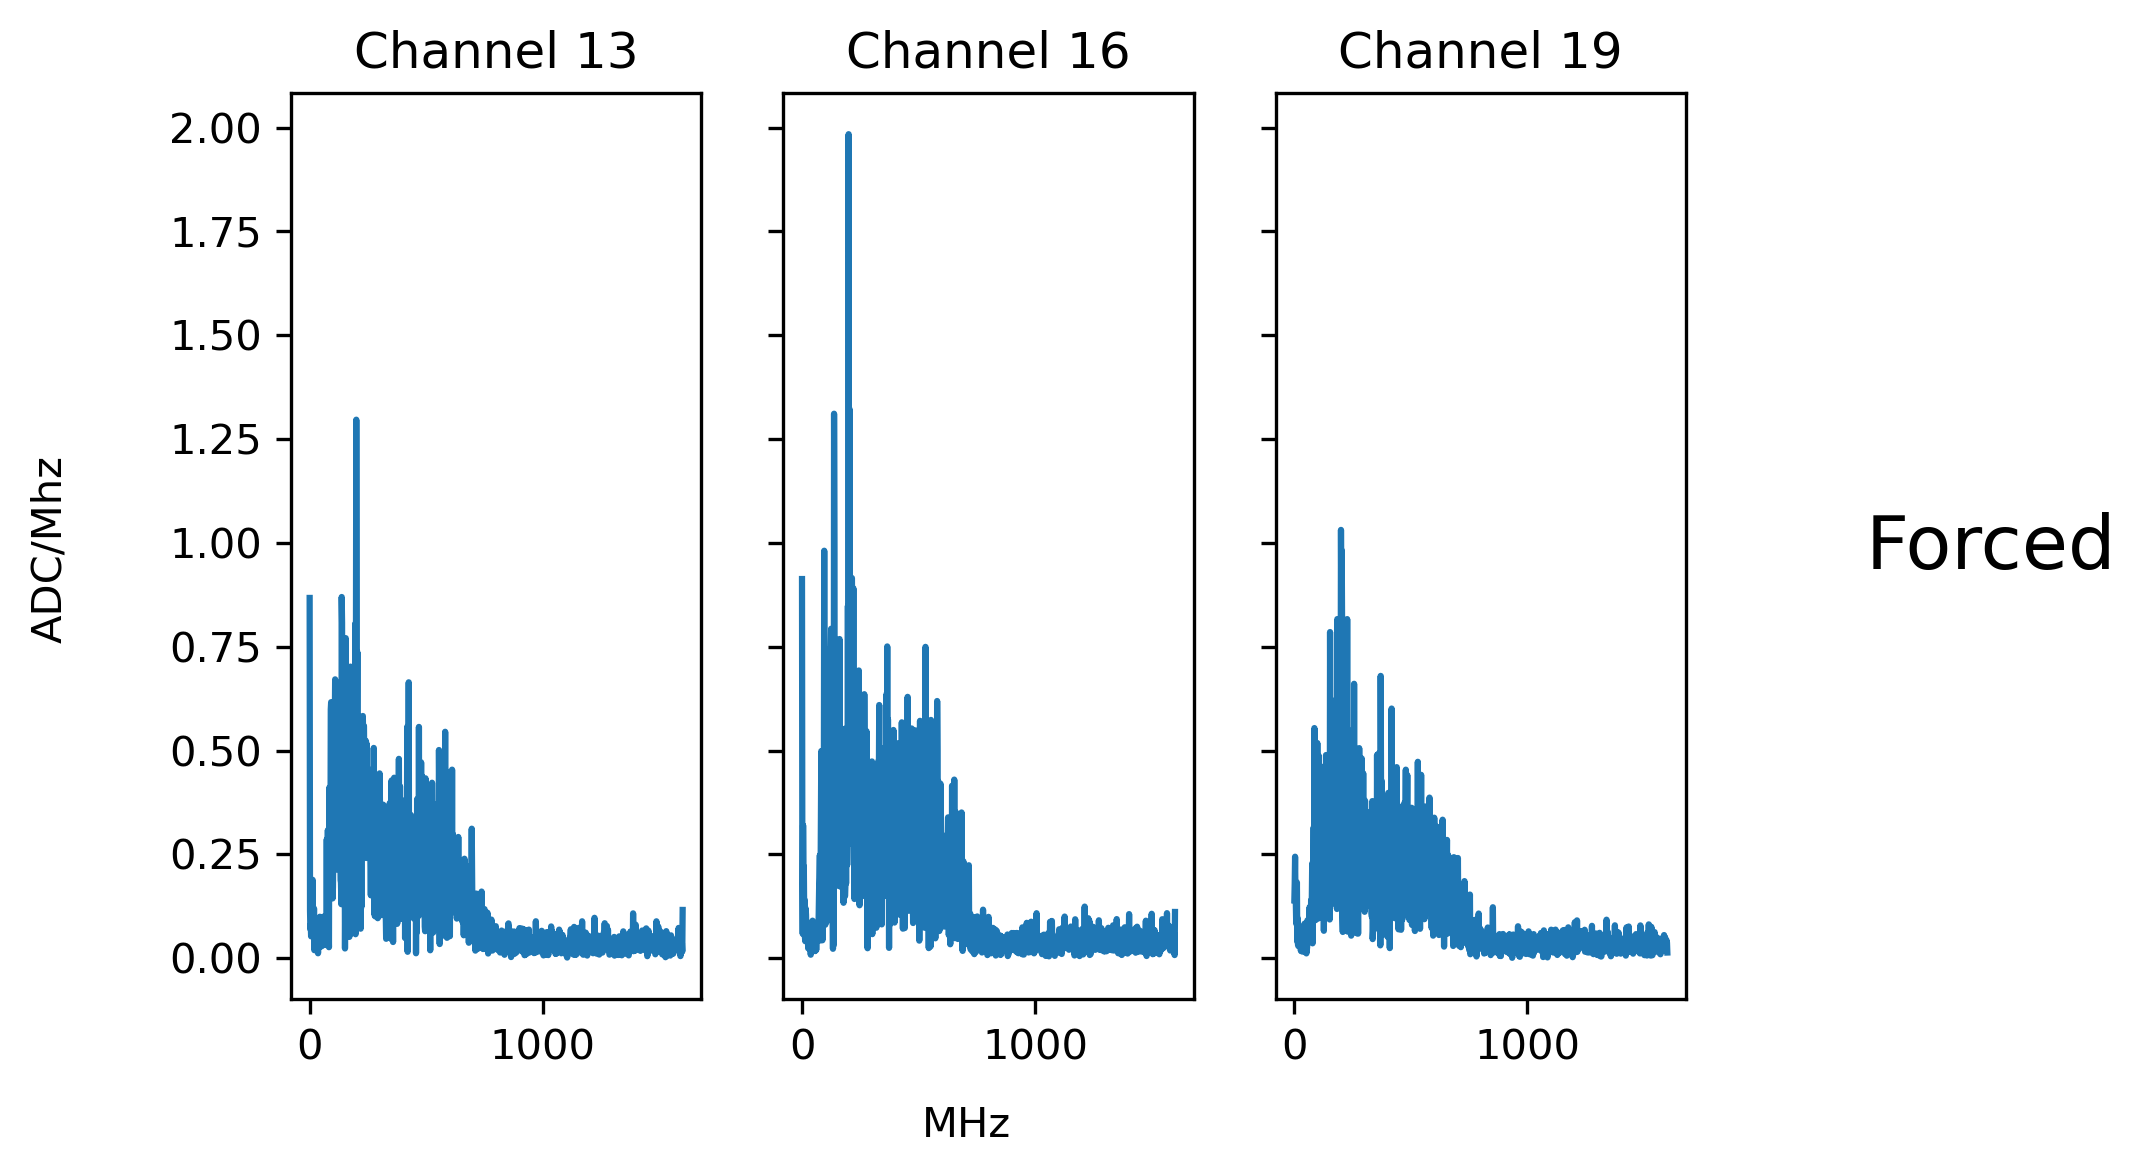

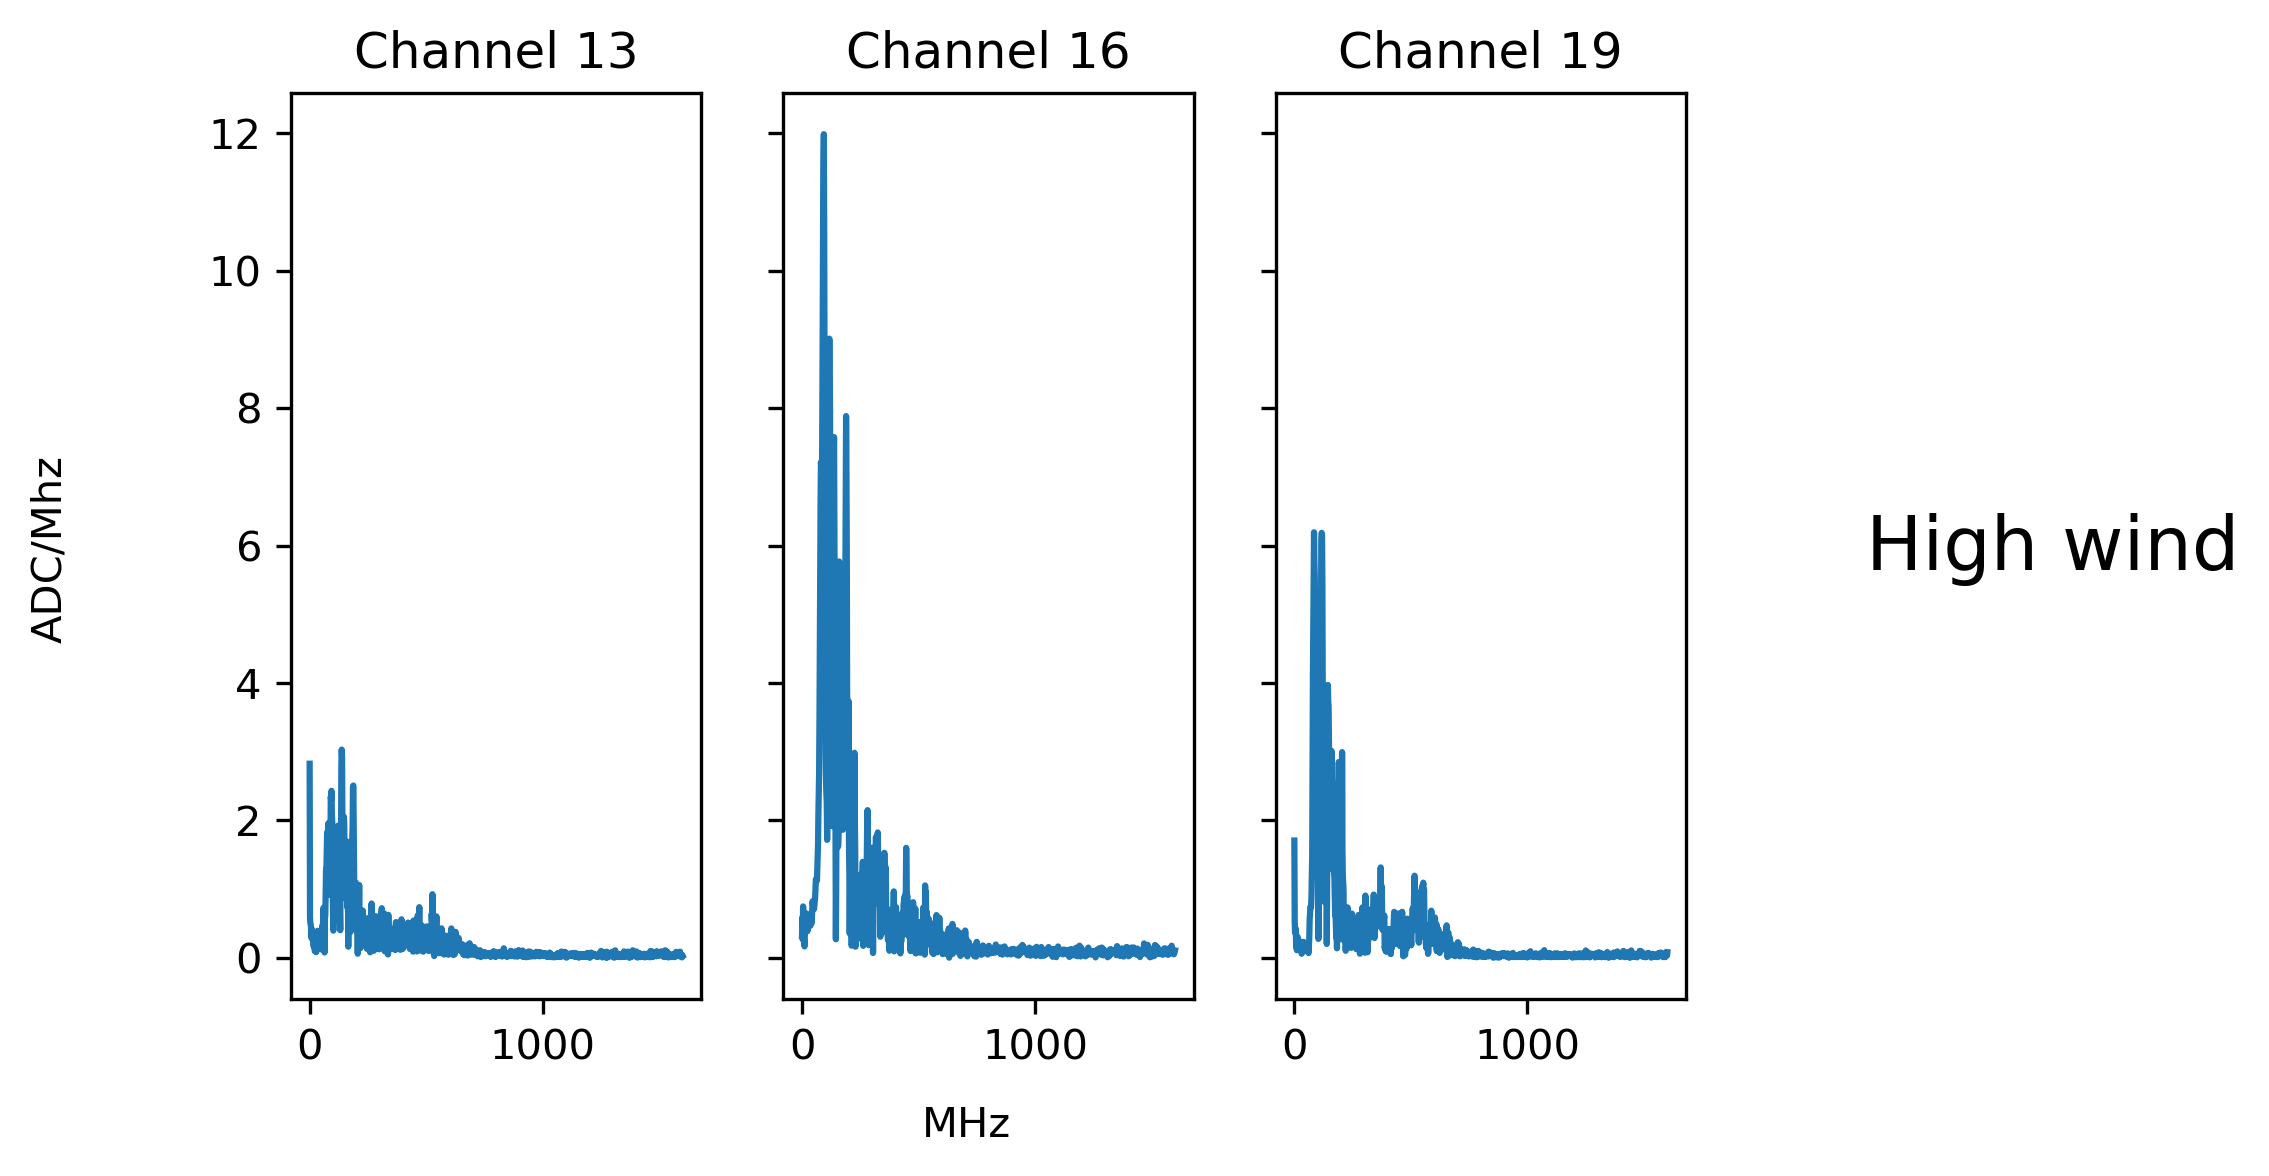

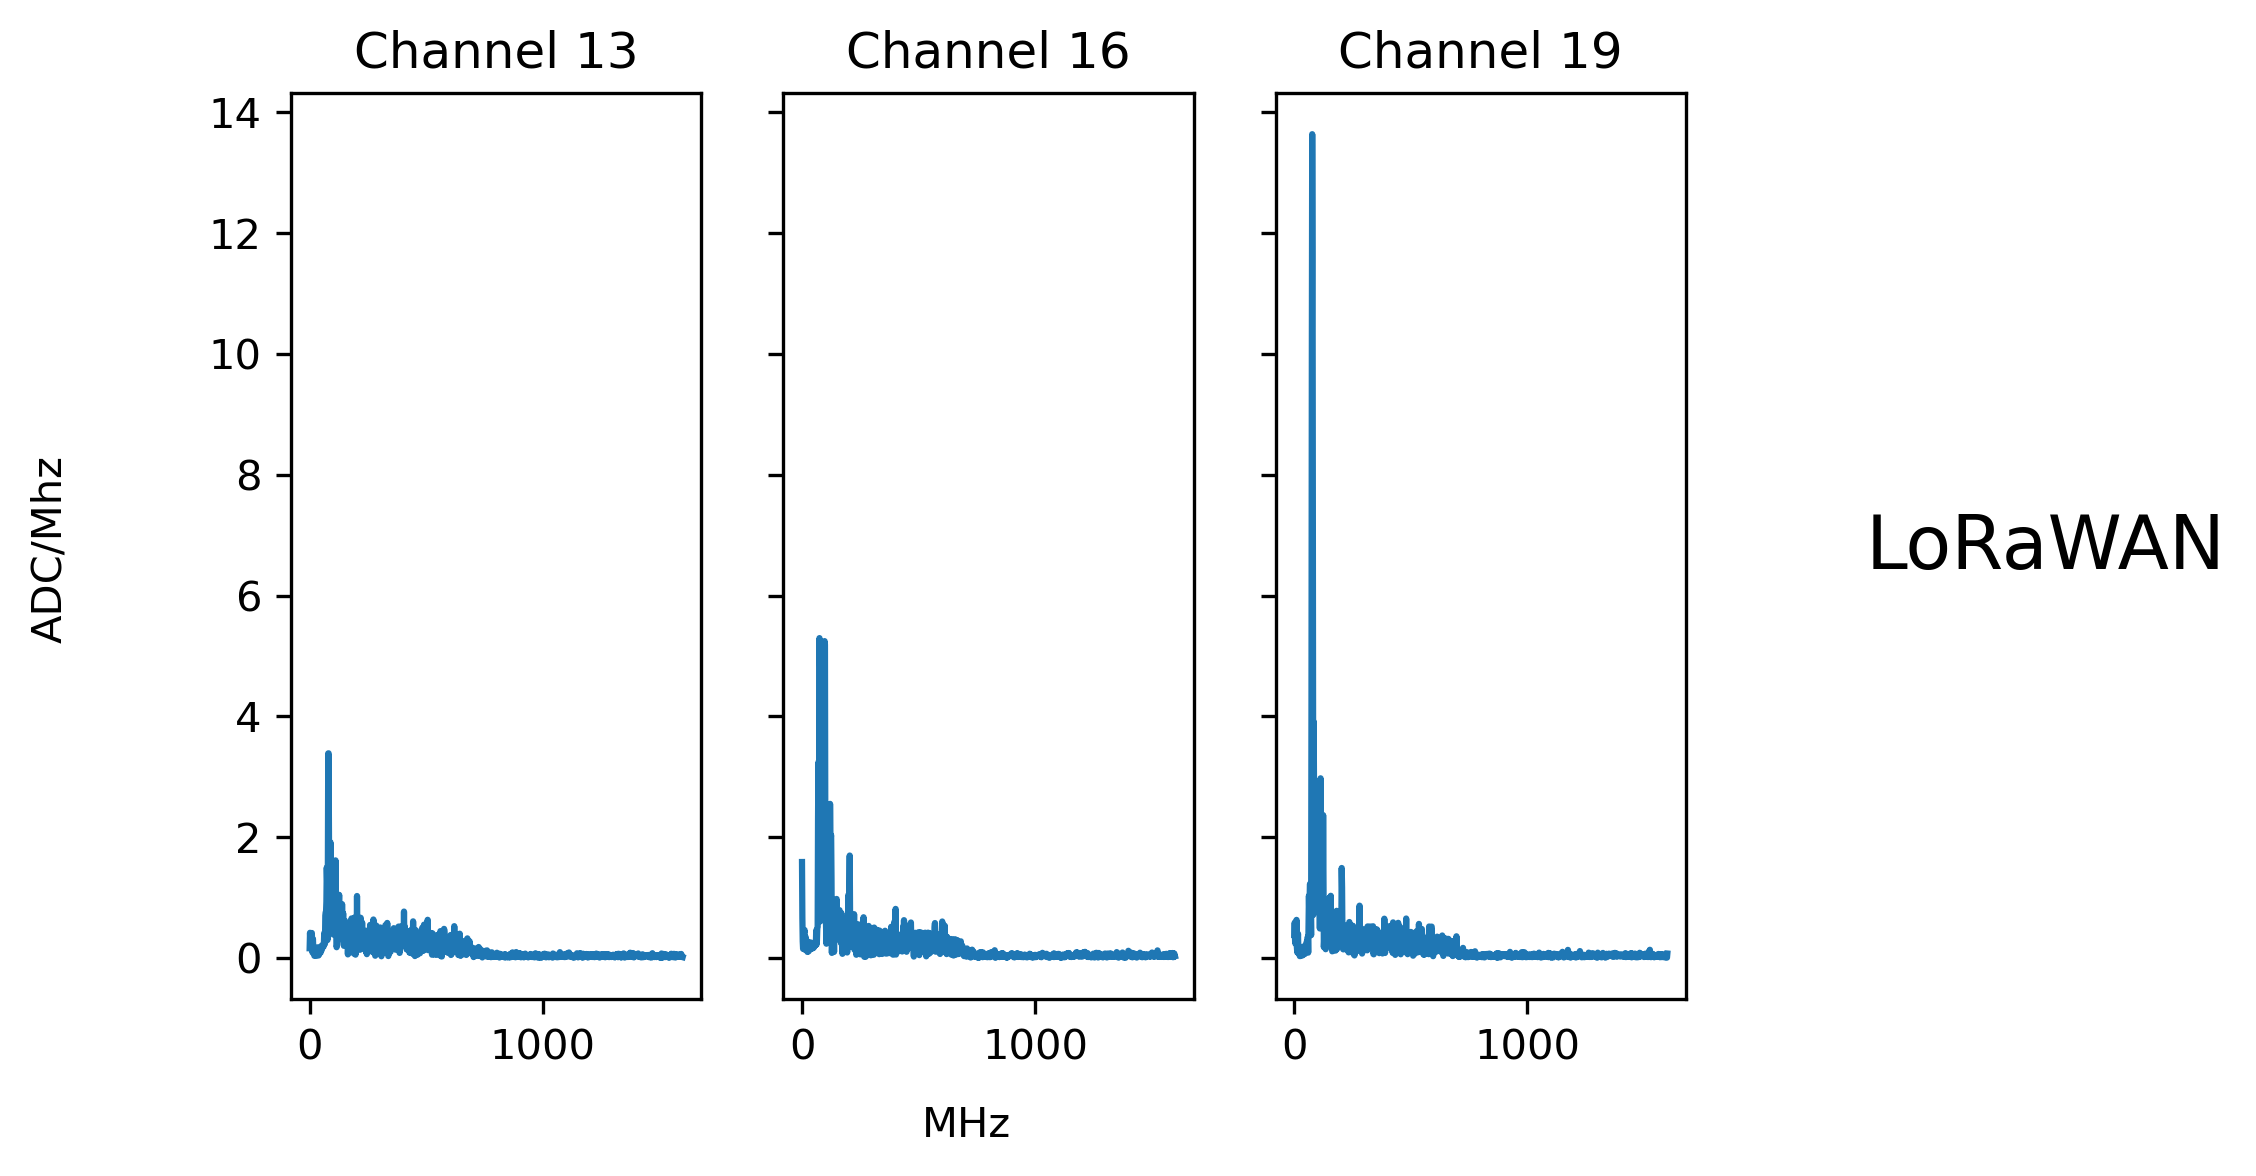

In [201]:
# Create array with type of triggers
trigger_type_array = [charging, cw, forced, high_wind, lorawan]
trigger_type_array_names = ["Charging", "CW", "Forced", "High wind", "LoRaWAN"]


# Loop through each trigger type
for k, trigger_type in enumerate(trigger_type_array):
    
    # Read data from trigger type
    reader = rnogDataReader.RNOGDataReader([trigger_type])
    
    # Get the first event
    event = reader.get_event_i(1)
    
    # Get station 
    station = event.get_station(event.get_station_ids()[0])
    
    # Get channels that corresponds to the upward facing LPDAs
    channel_ids = [13, 16, 19]
    
    # Plotting
    fig, ax = plt.subplots(1,3, sharex=True, sharey=True)

    for i, channel_id in enumerate(channel_ids):
        channel = station.get_channel(channel_id)
        ax[i].plot(channel.get_frequencies()/units.MHz, abs(channel.get_frequency_spectrum()))

        ax[i].set_title(f"Channel {channel_id}")


    fig.text(0.5, 0.01, 'MHz', ha='center')
    fig.text(-0.02, 0.5, 'ADC/Mhz', va='center', rotation='vertical')
    fig.text(1, 0.5, f"{trigger_type_array_names[k]}", va='center', fontsize = 18)

# Forced triggers

## Frequency spectrum for each channel for one event

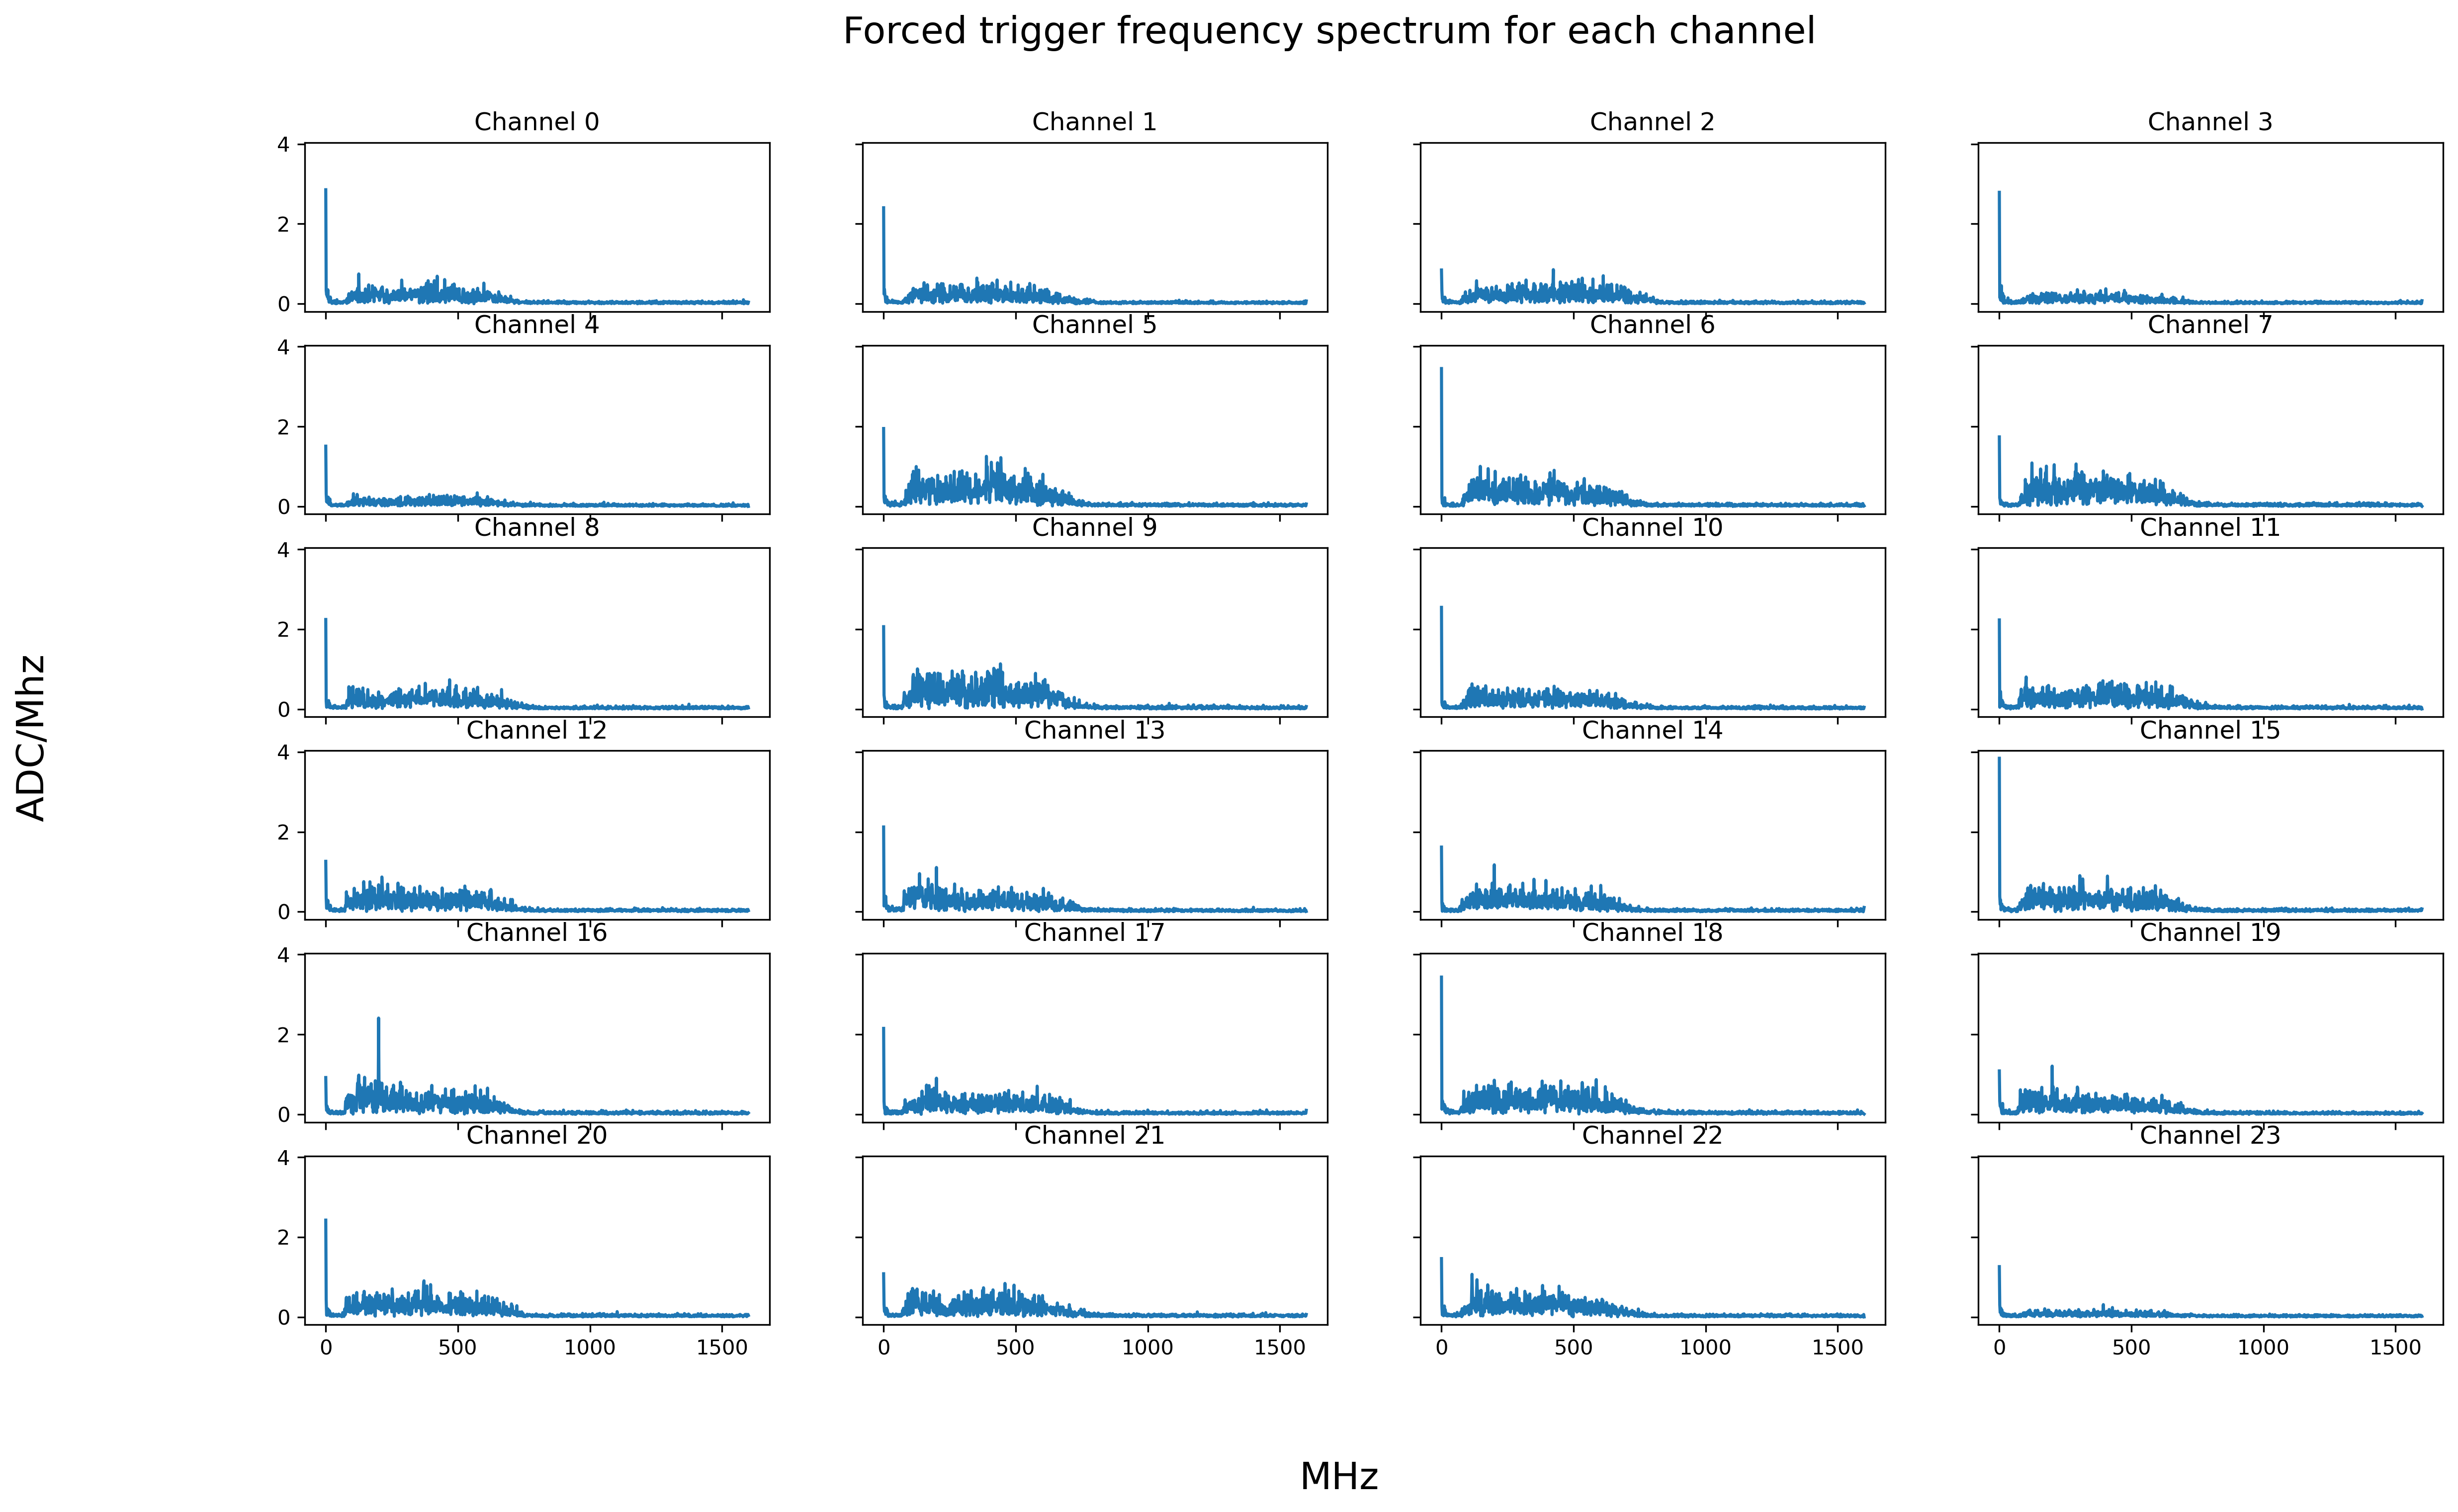

In [169]:
# Read data from trigger type
reader = rnogDataReader.RNOGDataReader([forced])
    
# Get the first event
event = reader.get_event_i(0)

# Get station 
station = event.get_station(event.get_station_ids()[0])

# Get channels that corresponds to the upward facing LPDAs
channel_ids = [13, 16, 19]

# Plotting
fig, ax = plt.subplots(6,4, sharex=True, sharey=True)

for i, channel_id in enumerate(station.get_channel_ids()):
    channel = station.get_channel(channel_id)
    ax[i//4, i%4].plot(channel.get_frequencies()/units.MHz, abs(channel.get_frequency_spectrum()))
    ax[i//4, i%4].set_title(f"Channel {channel_id}")


fig.text(0.5, 0.02, 'MHz', ha='center', fontsize = 18)
fig.text(0.02, 0.5, 'ADC/Mhz', va='center', rotation='vertical', fontsize = 18)
fig.text(0.32, 0.95, "Forced trigger frequency spectrum for each channel", va='center', fontsize = 18)
fig.set_size_inches(18.5, 10.5, forward=True)


## Average frequency spectrum for each channel

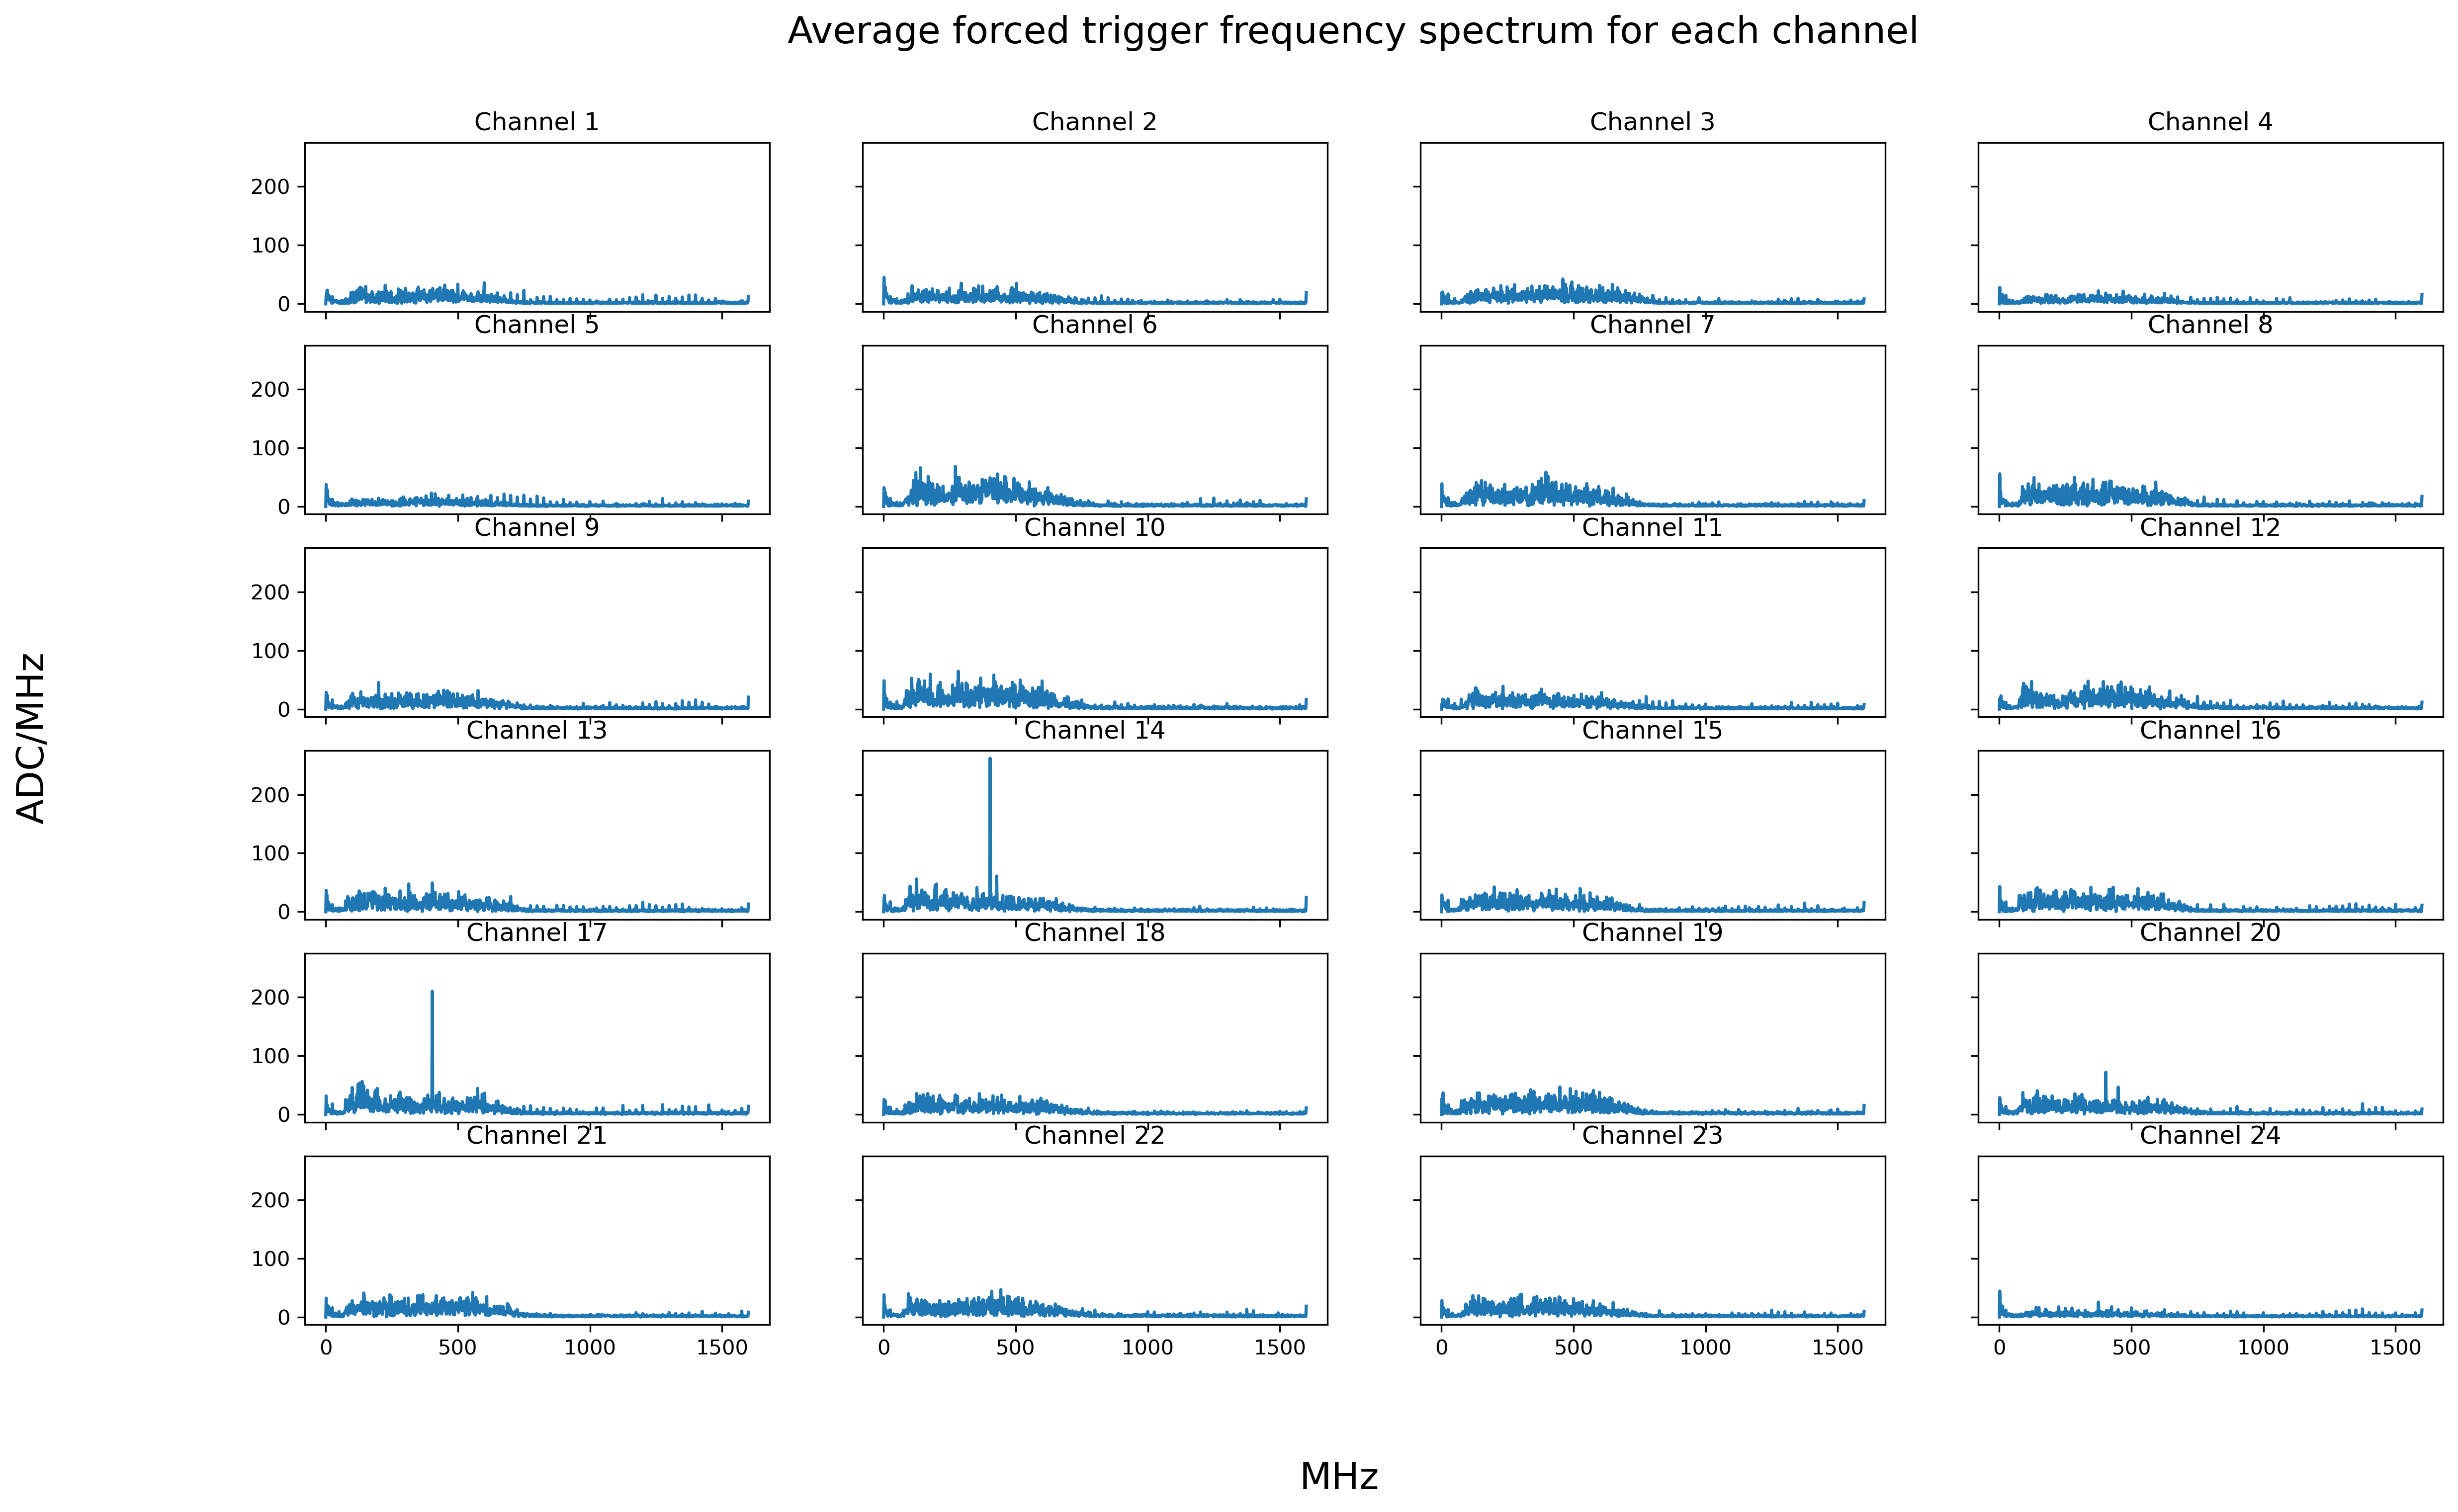

In [171]:
import uproot
from NuRadioReco.utilities import fft
from NuRadioReco.utilities import units
from NuRadioReco.framework import base_trace

# Create dummy trace to get frequencies
dummy_trace = base_trace.BaseTrace()
dummy_trace.set_trace(np.zeros(2048), sampling_rate = 3.2*units.GHz)


# get_event_i(0)
# get channel
# dummy_trace = channel

# Find all the forced data
f = uproot.open(forced)
trigger_flag = np.array(f["combined"]['header/trigger_info/trigger_info.force_trigger'], dtype=bool)
forced_data = np.array(f["combined"]['waveforms/radiant_data[24][2048]'])[trigger_flag, :, :]

fig, ax = plt.subplots(6,4, sharex=True, sharey=True)

for channel in range(24):
    # Get the traces for the specific channel
    channel_traces = forced_data[:,channel,:]
    
    # Caluclate the frequencies for the channel
    channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
    
    # Caluclate average frequency
    avg_freq = np.mean(channel_freq, axis=0)
    avg_freq[0] = 0
    
    ax[channel//4, channel%4].plot(dummy_trace.get_frequencies()/units.MHz,abs(avg_freq))
    ax[channel//4, channel%4].set_title(f"Channel {channel+1}")

fig.text(0.5, 0.02, 'MHz', ha='center', fontsize = 18)
fig.text(0.02, 0.5, 'ADC/MHz', va='center', rotation='vertical', fontsize = 18)
fig.text(0.3, 0.95, f"Average forced trigger frequency spectrum for each channel", va='center', fontsize = 18)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.rcParams["figure.dpi"]= 100

## Average frequency spectrum for upward-facing LPDAs

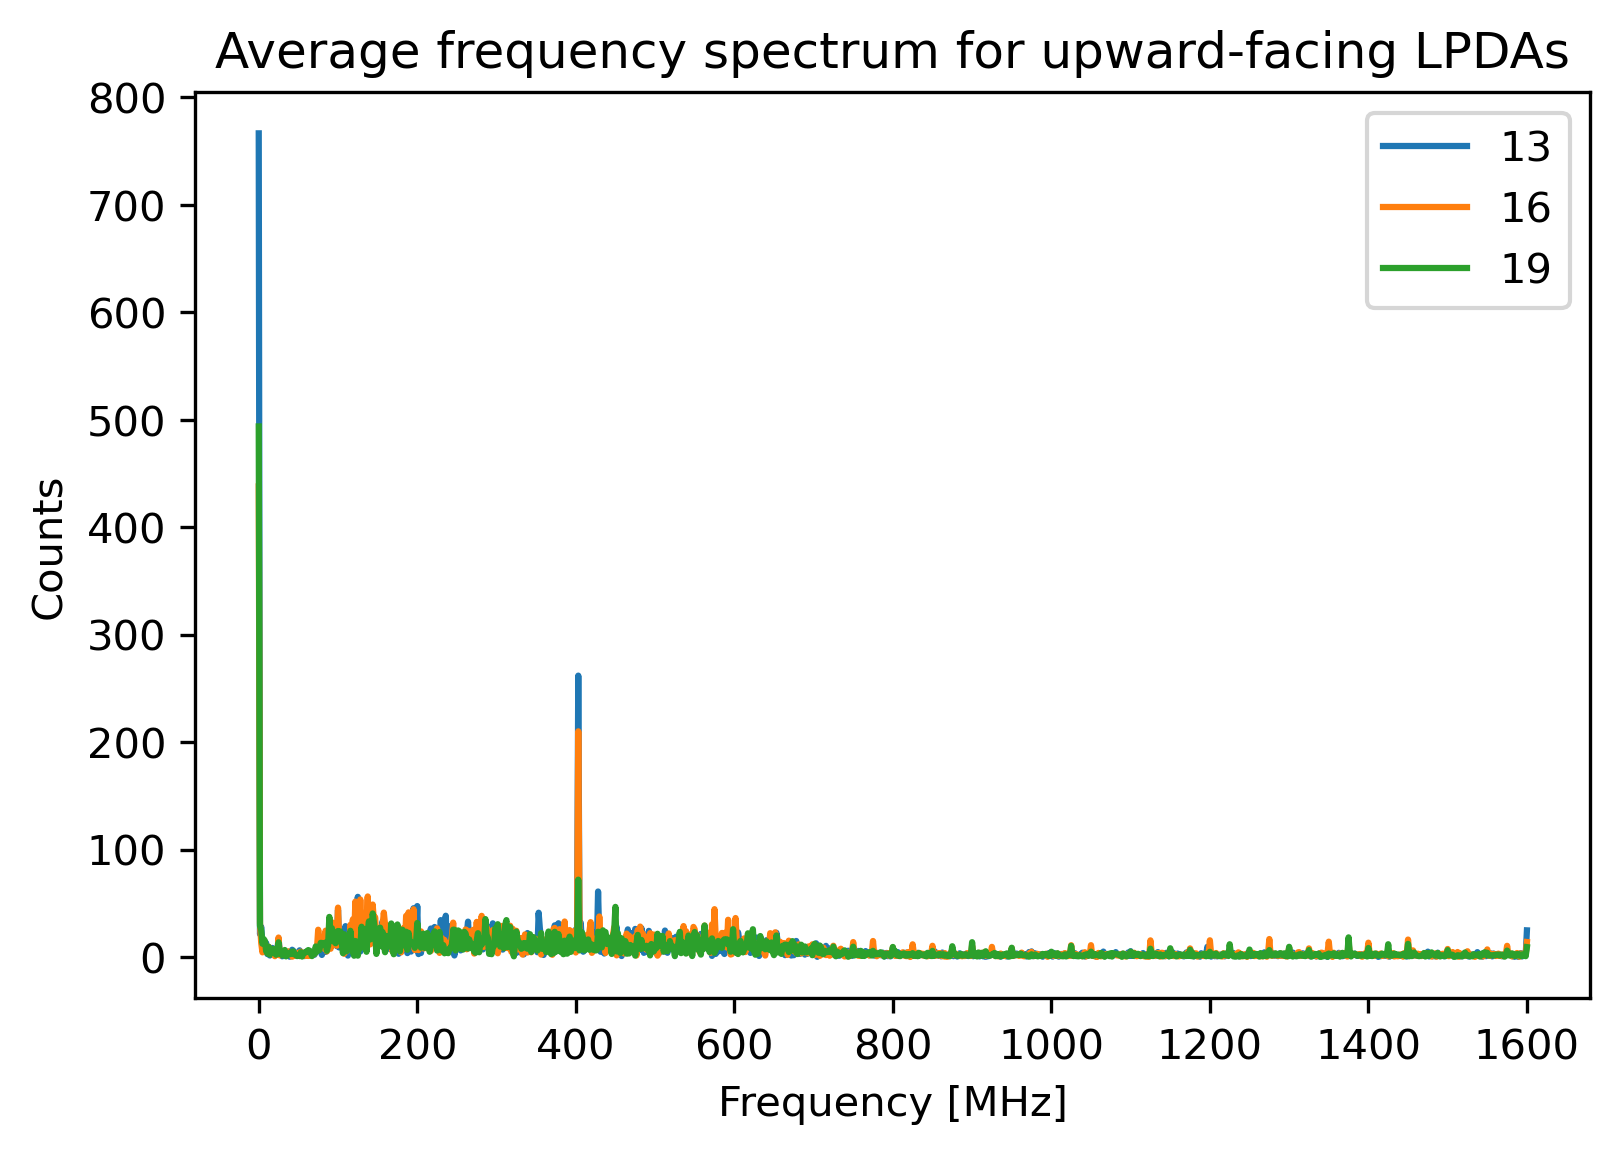

In [183]:
for channel in [13, 16, 19]:
    # Get the traces for the specific channel
    channel_traces = forced_data[:,channel,:]
    
    # Caluclate the frequencies for the channel
    channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
    
    # Caluclate average frequency
    avg_freq = np.mean(channel_freq, axis=0)
    
    plt.plot(dummy_trace.get_frequencies()/units.MHz,abs(avg_freq), label =f"{channel}")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Counts")
    plt.title("Average frequency spectrum for upward-facing LPDAs")
    plt.legend()
    
plt.rcParams["figure.dpi"]= 300

## Average frequency spectrum for Power string VPOLs at 100m depth

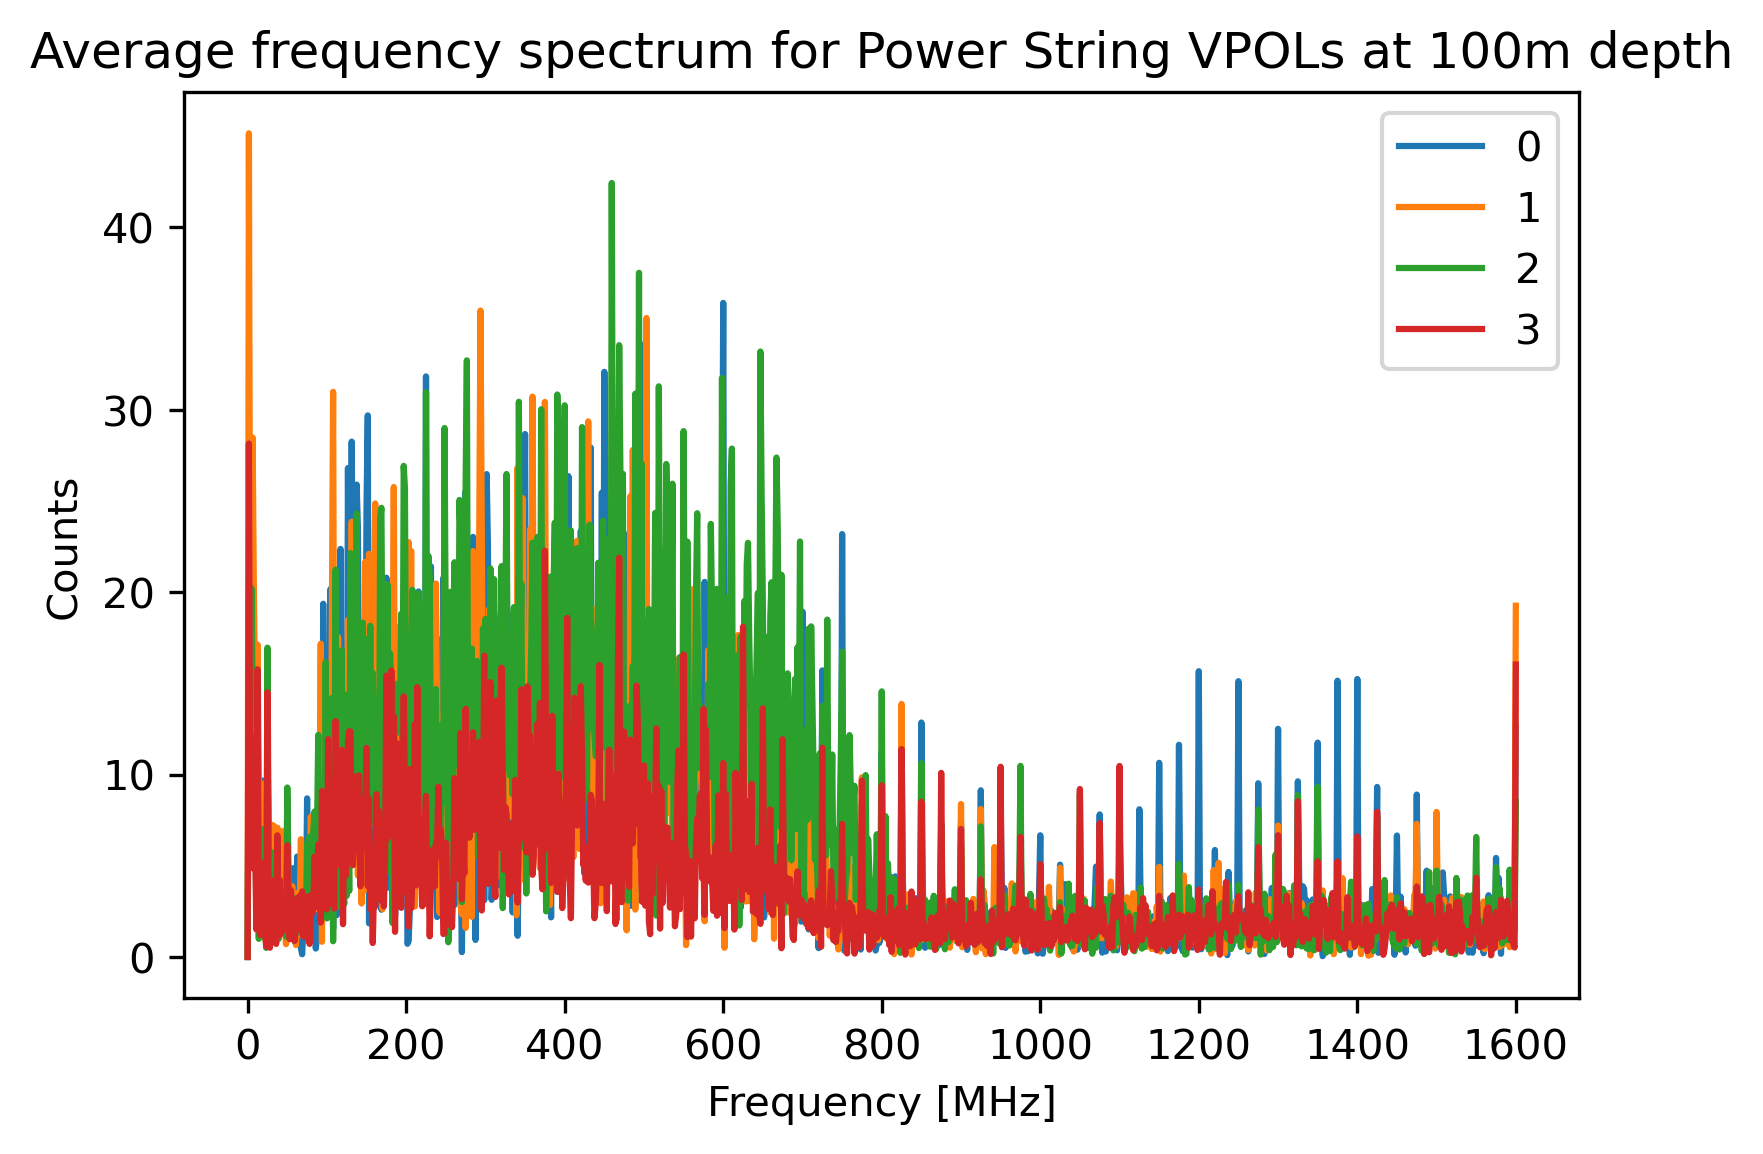

In [184]:
# Power string VPOL's 100m
for channel in [0, 1, 2, 3]:
    # Get the traces for the specific channel
    channel_traces = forced_data[:,channel,:]
    
    # Caluclate the frequencies for the channel
    channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
    
    # Caluclate average frequency
    avg_freq = np.mean(channel_freq, axis=0)
    avg_freq[0] = 0
    
    plt.plot(dummy_trace.get_frequencies()/units.MHz,abs(avg_freq), label =f"{channel}")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Counts")
    plt.title("Average frequency spectrum for Power String VPOLs at 100m depth")
    plt.legend()
    
plt.rcParams["figure.dpi"]= 300

## Average frequency spectrum for Power string HPOLs at 90m depth

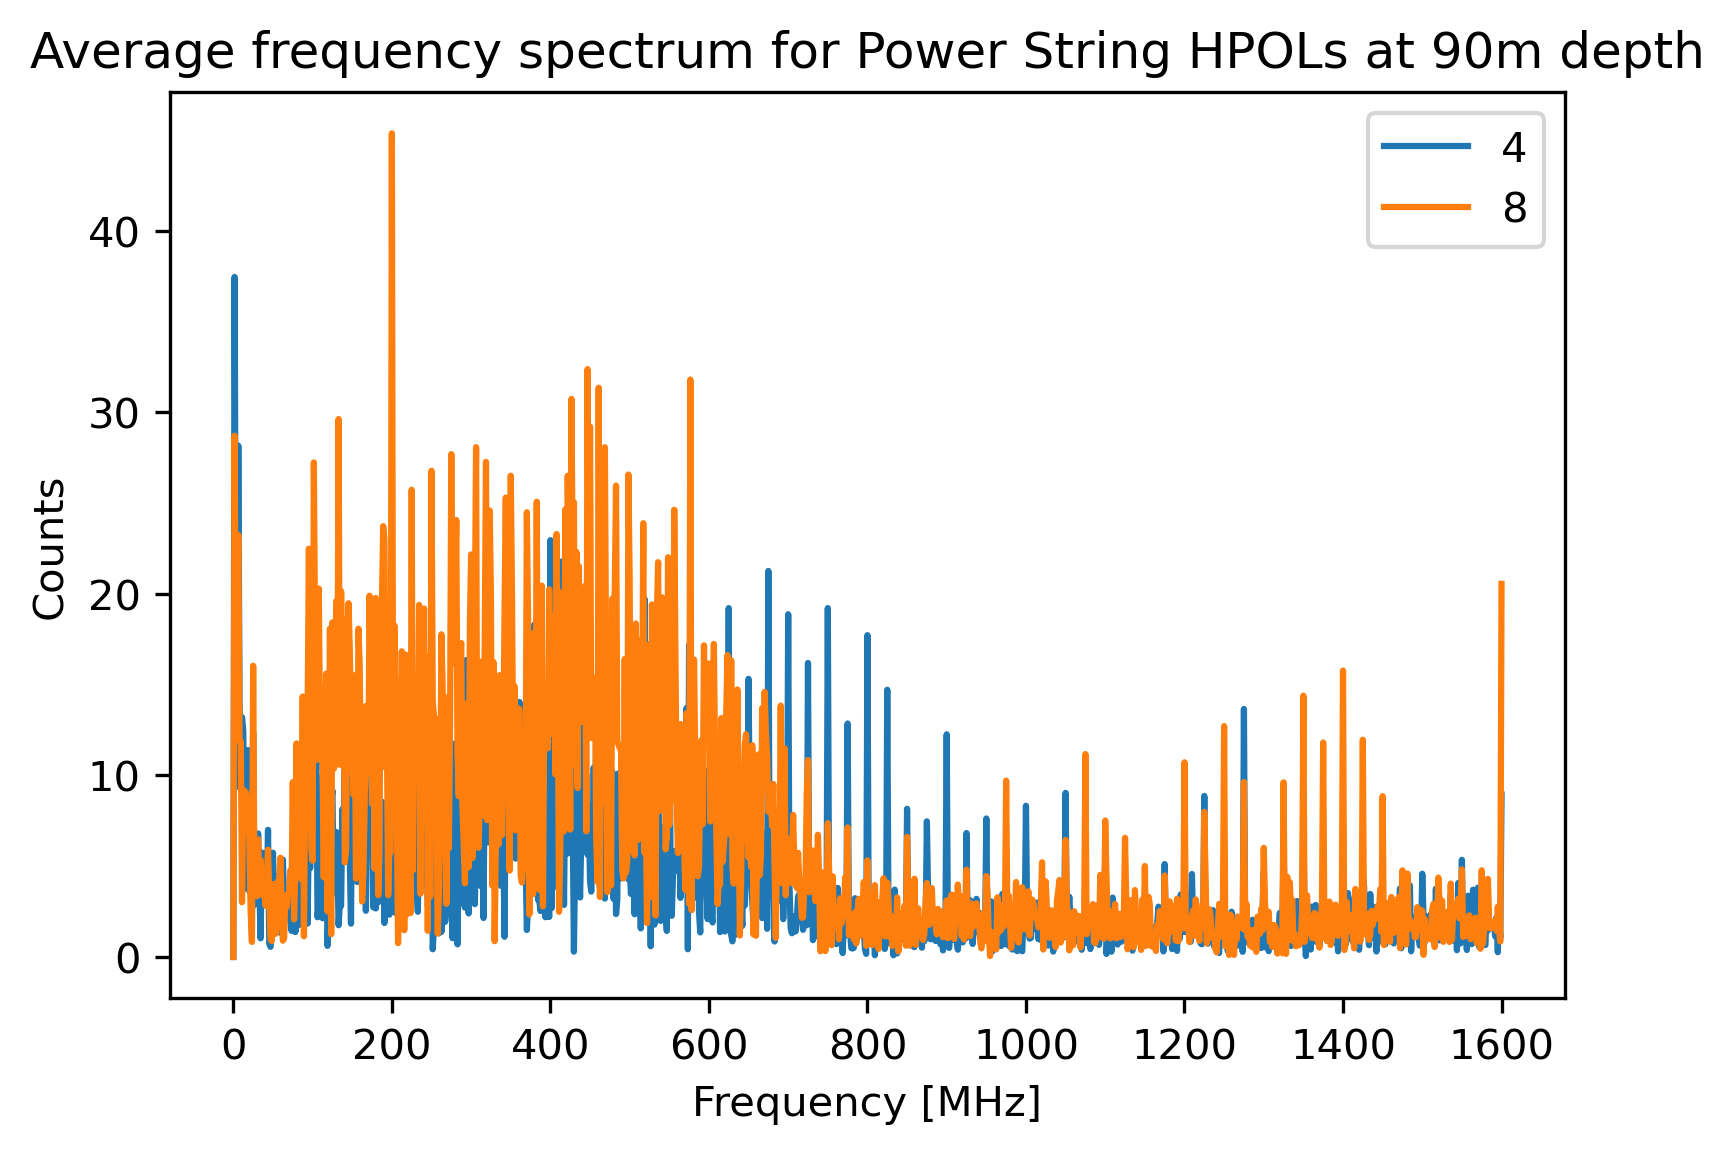

In [180]:

for channel in [4,8]:
    # Get the traces for the specific channel
    channel_traces = forced_data[:,channel,:]
    
    # Caluclate the frequencies for the channel
    channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
    
    # Caluclate average frequency
    avg_freq = np.mean(channel_freq, axis=0)
    avg_freq[0] = 0
    
    plt.plot(dummy_trace.get_frequencies()/units.MHz,abs(avg_freq), label =f"{channel}")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Counts")
    plt.title("Average frequency spectrum for Power String HPOLs at 90m depth")
    plt.legend()
    
plt.rcParams["figure.dpi"]= 300

## Average frequency spectrum for Power string VPOLs from 40-80m depth

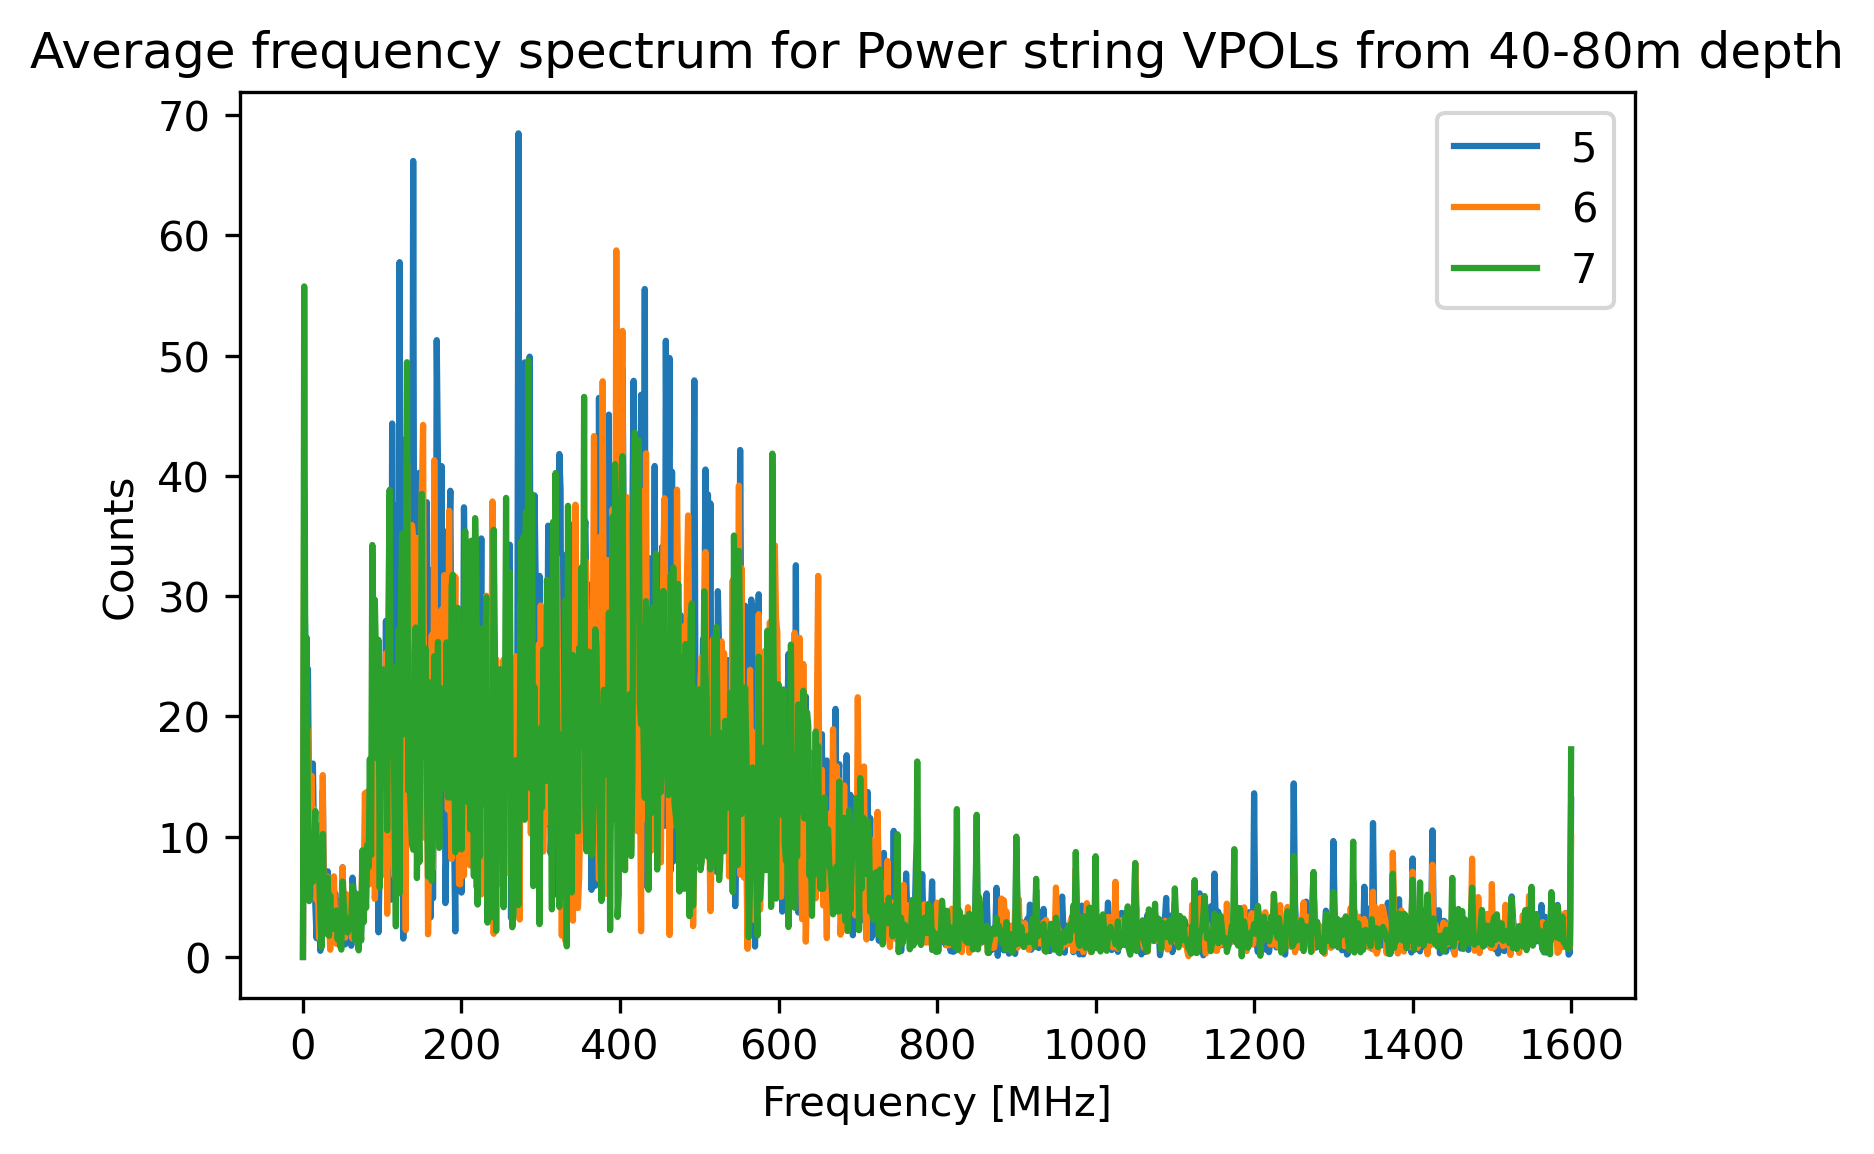

In [181]:

for channel in [5,6,7]:
    # Get the traces for the specific channel
    channel_traces = forced_data[:,channel,:]
    
    # Caluclate the frequencies for the channel
    channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
    
    # Caluclate average frequency
    avg_freq = np.mean(channel_freq, axis=0)
    avg_freq[0] = 0
    
    plt.plot(dummy_trace.get_frequencies()/units.MHz,abs(avg_freq), label =f"{channel}")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Counts")
    plt.title("Average frequency spectrum for Helper String VPOLs at 100m depth")
    plt.legend()
    
plt.rcParams["figure.dpi"]= 300

## Average frequency spectrum for Helper String VPOLs 100m depth

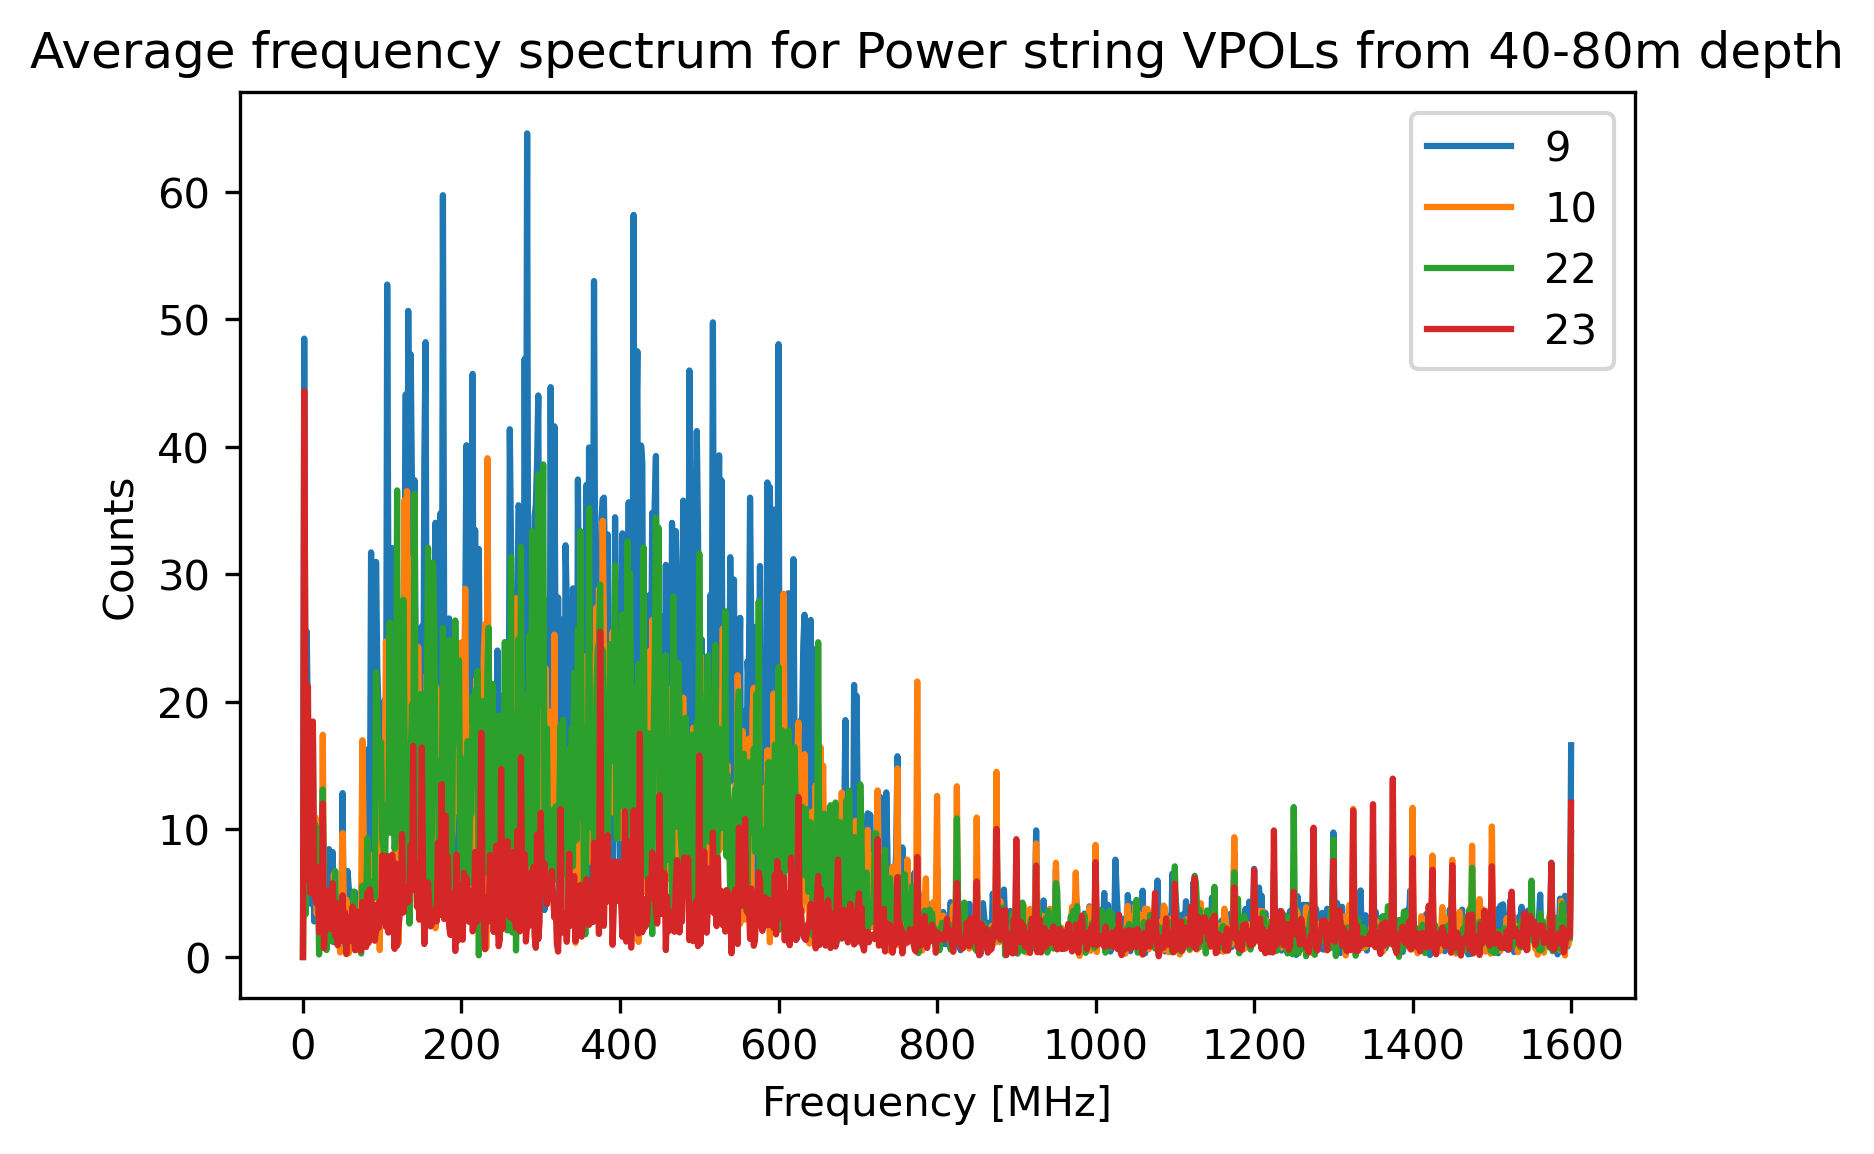

In [188]:

for channel in [9,10,22,23]:
    # Get the traces for the specific channel
    channel_traces = forced_data[:,channel,:]
    
    # Caluclate the frequencies for the channel
    channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
    
    # Caluclate average frequency
    avg_freq = np.mean(channel_freq, axis=0)
    avg_freq[0] = 0
    
    plt.plot(dummy_trace.get_frequencies()/units.MHz,abs(avg_freq), label =f"{channel}")
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Counts")
    plt.title("Average frequency spectrum for Power string VPOLs from 40-80m depth")
    plt.legend()
    
plt.rcParams["figure.dpi"]= 300

## Frequency color map

(363, 1025)
[[2121.7622853   146.04068004  149.28103375 ...   11.49634717
    41.89466444   10.16465998]
 [ 867.53163217  115.68140594   69.99285691 ...   36.20884482
    16.09034383  116.23067716]
 [ 286.82018812  879.56855736  351.42631369 ...   28.49210506
    23.59108363   71.15261986]
 ...
 [1708.1048183    25.81599766  174.18305949 ...   11.82498085
    25.01373368    3.97747564]
 [ 391.56038008  715.15864851   97.00910399 ...   33.71475474
    27.60762143   52.14912511]
 [2275.55801021  200.23963903  138.72951306 ...   48.42329038
    57.77636111    7.51300955]]


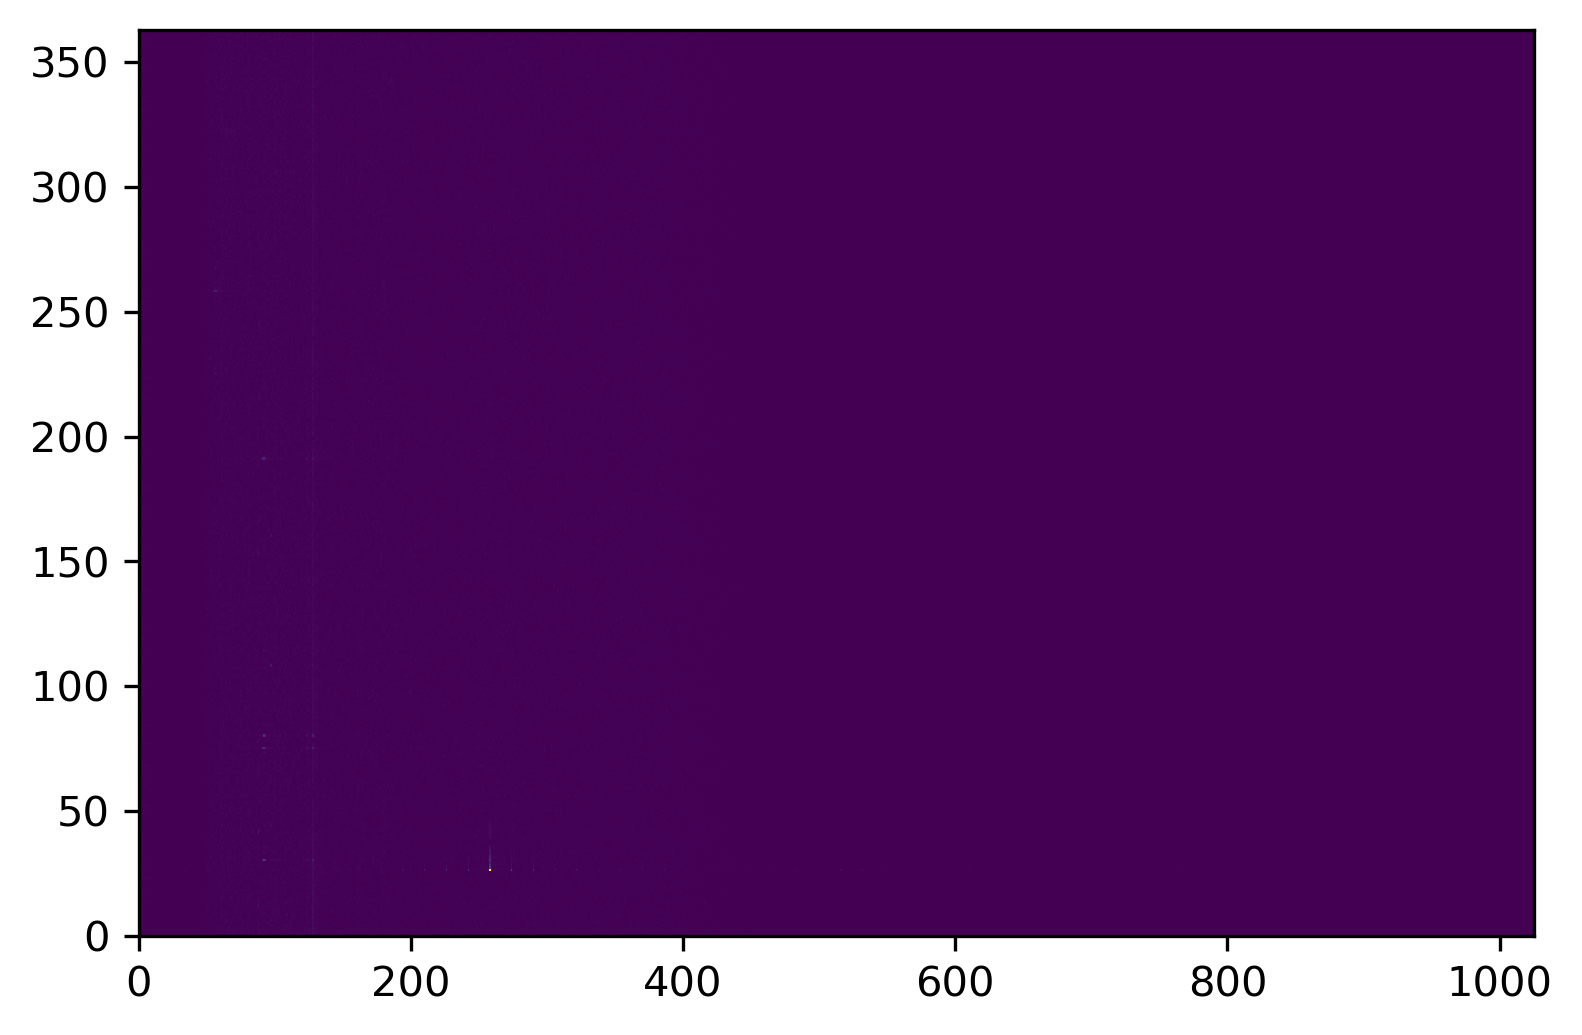

In [200]:
# Get the traces for the specific channel
channel_traces = forced_data[:,13,:]

# Caluclate the frequencies for the channel
channel_freq = fft.time2freq(channel_traces, 3.2*units.GHz)
print(np.shape(channel_freq))

print(abs(channel_freq))
plt.pcolormesh(abs(channel_freq))

(363, 2048)


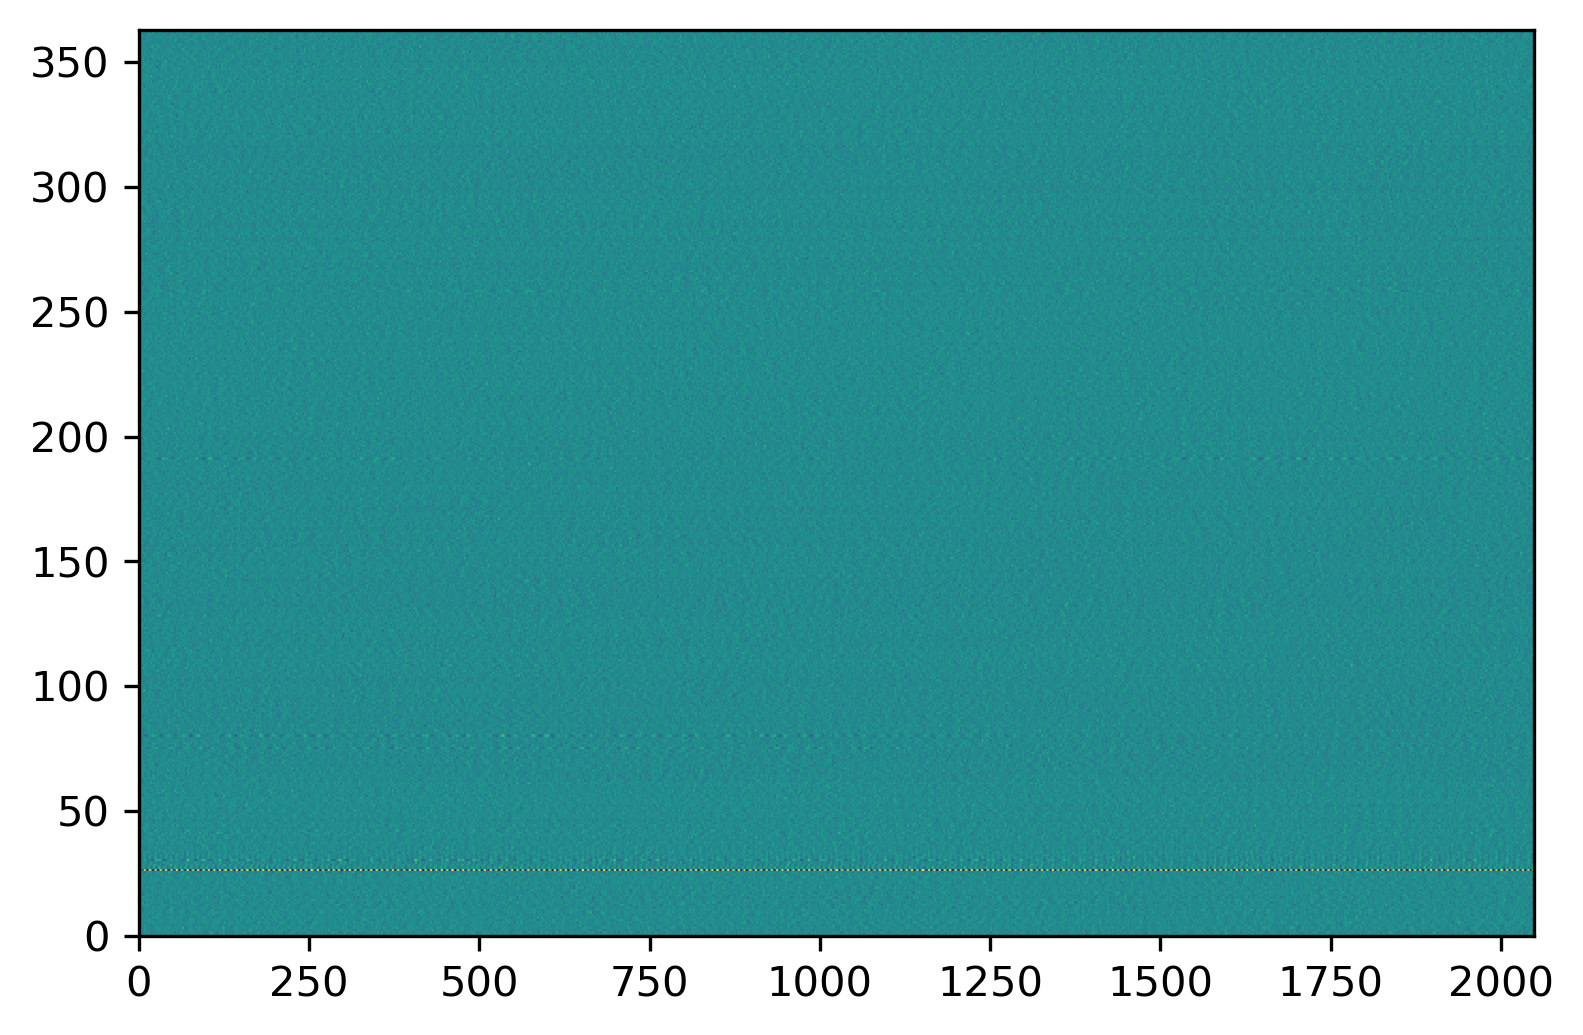

In [199]:
print(np.shape(channel_traces))
plt.rcParams["figure.dpi"]= 300
plt.pcolormesh(channel_traces)
#plt.ylim(25,55)



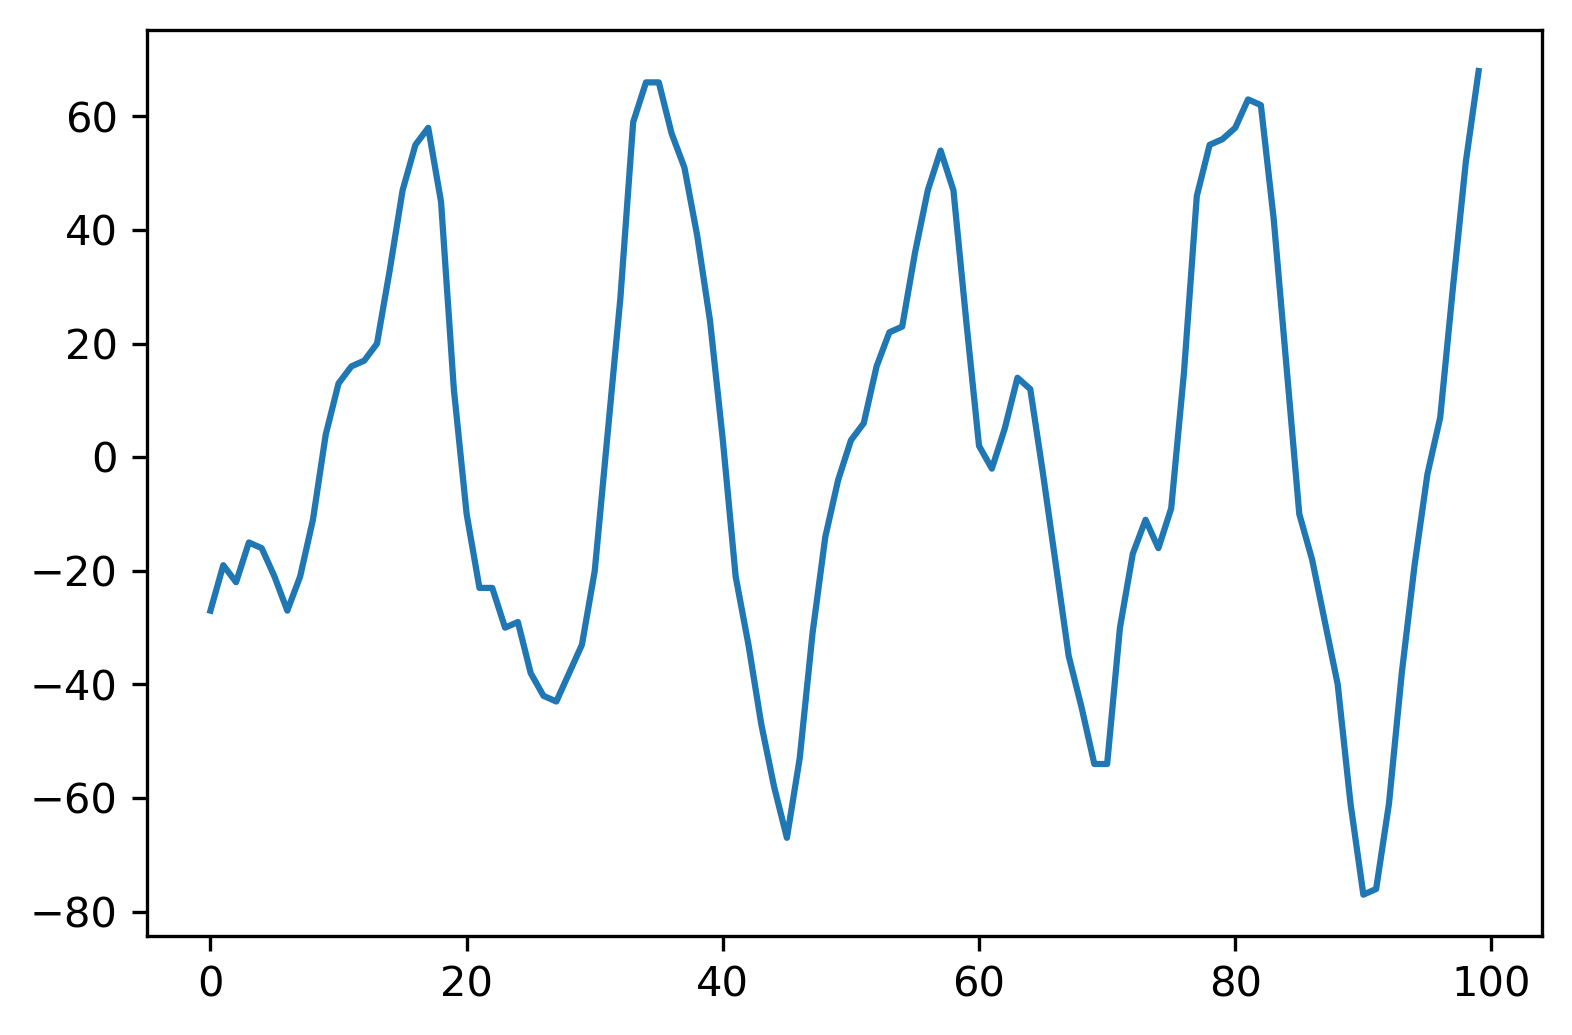

In [120]:
plt.plot(channel_traces[30][:100])